## **Introduction**

With the reviews of the hotels, we can get insights about the rated hotels in Europe and we can predict what is the best hotel for staying in Europe. We gonna predict is customers satisfied or not satisfied with the hotel according to the given reviews and hotel qualifications. Also, we will analyze the best hotels to stay in. 

## **Importing Libraries**

In [121]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import time
import random
from collections import Counter
from nltk.corpus import wordnet
import re, nltk
import string
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import WhitespaceTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import folium
from nltk import pos_tag
from matplotlib.colors import LinearSegmentedColormap
import missingno as msno
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from matplotlib import pyplot
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/515k-hotel-reviews-data-in-europe/Hotel_Reviews.csv


## **Exploratory Data Analysis**

**Dataset Description**

* **Hotel_Address:** Address of hotel.
* **Review_Date:** Date when reviewer posted the corresponding review.
* **Average_Score:** Average Score of the hotel, calculated based on the latest comment in the last year.
* **Hotel_Name:** Name of Hotel
* **Reviewer_Nationality:** Nationality of Reviewer
* **Negative_Review:** Negative Review the reviewer gave to the hotel. If the reviewer does not give the negative review, then it should be: 'No Negative'
* **Review_Total_Negative_Word_Counts:** Total number of words in the negative review.
* **Positive_Review:** Positive Review the reviewer gave to the hotel. If the reviewer does not give the negative review, then it should be: 'No Positive'
* **Review_Total_Positive_Word_Counts:** Total number of words in the positive review.
* **Reviewer_Score:** Score the reviewer has given to the hotel, based on his/her experience
* **Total_Number_of_Reviews_Reviewer_Has_Given:** Number of Reviews the reviewers has given in the past.
* **Total_Number_of_Reviews:** Total number of valid reviews the hotel has.
* **Tags:** Tags reviewer gave the hotel.
* **days_since_review:** Duration between the review date and scrape date.
* **Additional_Number_of_Scoring:** There are also some guests who just made a scoring on the service rather than a review. This number indicates how many valid scores without review in there.
* **lat:** Latitude of the hotel
* **lng:** longtitude of the hotel

In [35]:
# Importing Dataset
df = pd.read_csv('../input/515k-hotel-reviews-data-in-europe/Hotel_Reviews.csv')

In [36]:
# Column names
df.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')

In [37]:
# shape of the data
df.shape

(515738, 17)

We have **17** columns and **515738** rows.

In [38]:
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


**Data Cleaning**

In [39]:
# Removing duplicate values
print(sum(df.duplicated()))
df = df.drop_duplicates()

526


We have **526** duplicated values. After we delete them we reshaped the data.

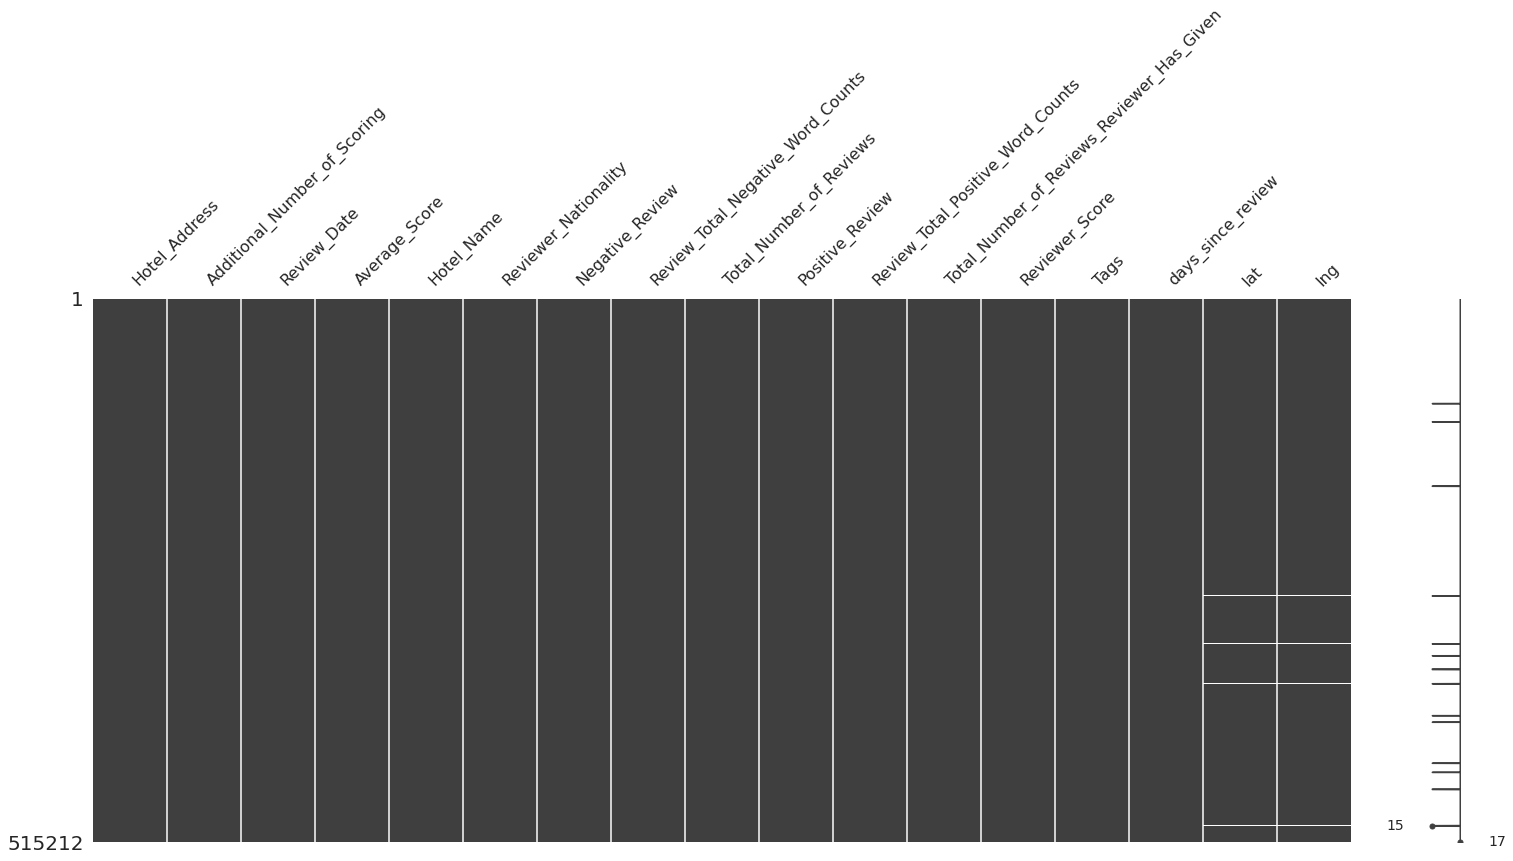

In [40]:
# Checking missing values
msno.matrix(df)

In [41]:
df.isnull().sum()

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64

As we see there are **3268 Nan** (missing values) on the lat and lng columns.

In [42]:
nans = lambda df: df[df.isnull().any(axis=1)]
nans_df = nans(df)
nans_df = nans_df[['Hotel_Name','lat','lng']]
nans_df.Hotel_Name.describe()

count                                    3268
unique                                     17
top       Fleming s Selection Hotel Wien City
freq                                      658
Name: Hotel_Name, dtype: object

In [43]:
# frequency of the missing values
nans_df.Hotel_Name.value_counts()

Fleming s Selection Hotel Wien City                 658
Hotel City Central                                  563
Hotel Atlanta                                       389
Maison Albar Hotel Paris Op ra Diamond              290
Hotel Daniel Vienna                                 245
Hotel Pension Baron am Schottentor                  223
Austria Trend Hotel Schloss Wilhelminenberg Wien    194
Derag Livinghotel Kaiser Franz Joseph Vienna        147
NH Collection Barcelona Podium                      146
City Hotel Deutschmeister                            93
Hotel Park Villa                                     61
Cordial Theaterhotel Wien                            57
Holiday Inn Paris Montmartre                         55
Roomz Vienna                                         49
Mercure Paris Gare Montparnasse                      37
Renaissance Barcelona Hotel                          33
Hotel Advance                                        28
Name: Hotel_Name, dtype: int64

If we just drop these rows we can lose some information so we don't want that. Because of that we gonna try to fill these missing values with similar lng, lat values or If the hotel address match with another columns.

As you can see there are just 17 hotel where we don't know their locations so we gonna fill them manually. (If it was a huge number of hotels then we should use another option to fill them)

In [44]:
#latitude information of Hotels
loc_lat = {'Fleming s Selection Hotel Wien City':48.209270,
       'Hotel City Central':48.2136,
       'Hotel Atlanta':48.210033,
       'Maison Albar Hotel Paris Op ra Diamond':48.875343,
       'Hotel Daniel Vienna':48.1888,
       'Hotel Pension Baron am Schottentor':48.216701,
      'Austria Trend Hotel Schloss Wilhelminenberg Wien':48.2195,
      'Derag Livinghotel Kaiser Franz Joseph Vienna':48.245998,
      'NH Collection Barcelona Podium':41.3916,
      'City Hotel Deutschmeister':48.22088,
      'Hotel Park Villa':48.233577,
      'Cordial Theaterhotel Wien':48.209488,
      'Holiday Inn Paris Montmartre':48.888920,
      'Roomz Vienna':48.186605,
      'Mercure Paris Gare Montparnasse':48.840012,
      'Renaissance Barcelona Hotel':41.392673,
      'Hotel Advance':41.383308}

#longitude information of Hotels
loc_lng ={'Fleming s Selection Hotel Wien City':16.353479,
       'Hotel City Central':16.3799,
       'Hotel Atlanta':16.363449,
       'Maison Albar Hotel Paris Op ra Diamond':2.323358,
       'Hotel Daniel Vienna':16.3840,
       'Hotel Pension Baron am Schottentor':16.359819,
      'Austria Trend Hotel Schloss Wilhelminenberg Wien':16.2856,
      'Derag Livinghotel Kaiser Franz Joseph Vienna':16.341080,
      'NH Collection Barcelona Podium':2.1779,
      'City Hotel Deutschmeister':16.36663,
      'Hotel Park Villa':16.345682,
      'Cordial Theaterhotel Wien':16.351585,
      'Holiday Inn Paris Montmartre':2.333087,
      'Roomz Vienna':16.420643,
      'Mercure Paris Gare Montparnasse':2.323595,
      'Renaissance Barcelona Hotel':2.167494,
      'Hotel Advance':2.162828}

#filling the latitude information
df['lat'] = df['lat'].fillna(df['Hotel_Name'].apply(lambda x: loc_lat.get(x)))
#filling longitude information
df['lng'] = df['lng'].fillna(df['Hotel_Name'].apply(lambda x: loc_lng.get(x)))

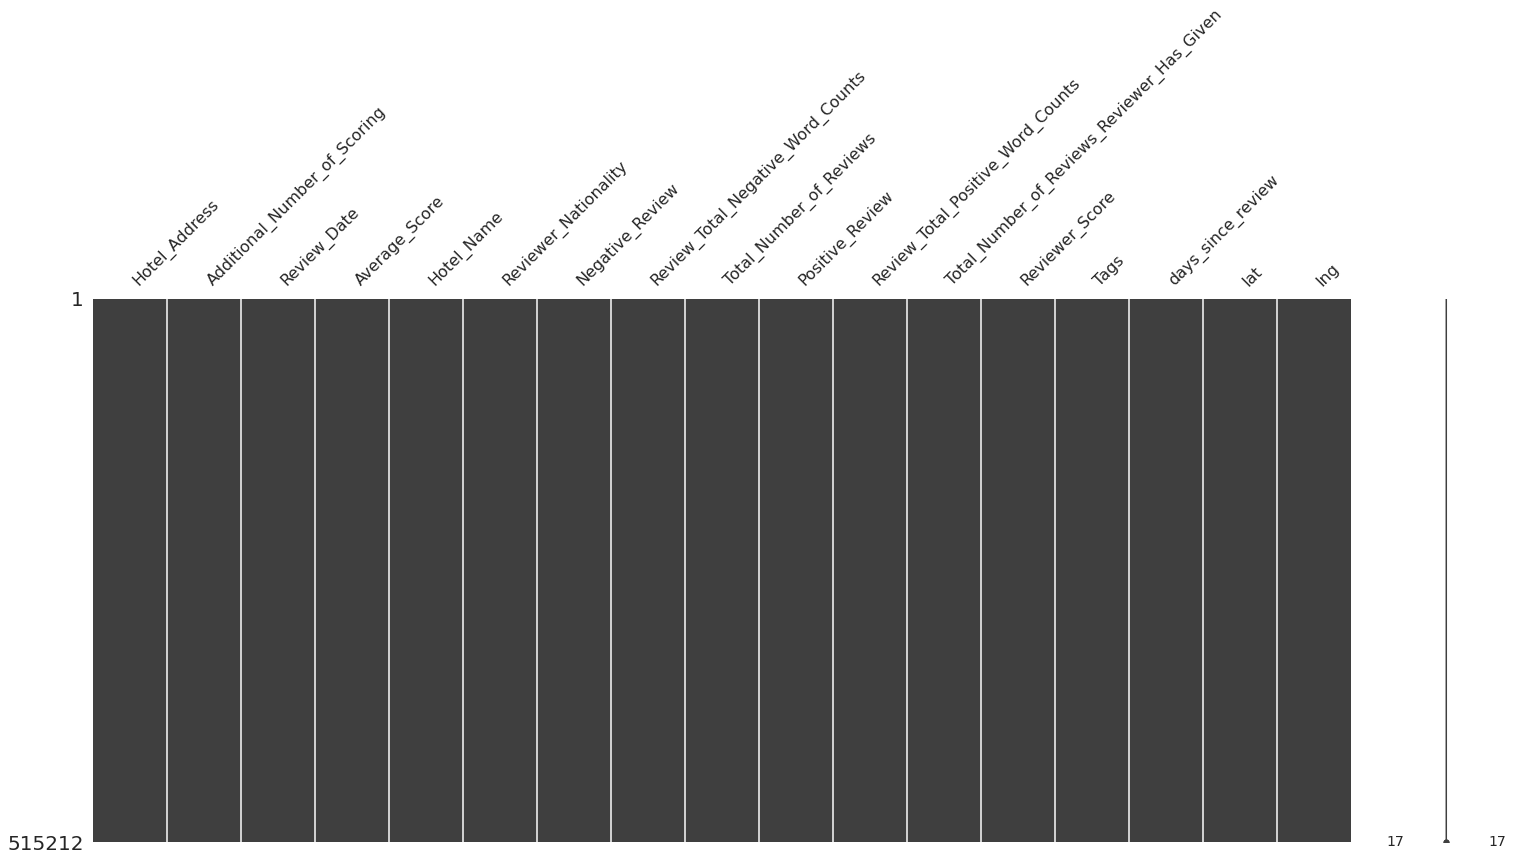

In [45]:
#looking whether information is correctly filled or not.
msno.matrix(df)

**Insights From Data**

* **Based on the Hotel Names**

In [46]:
df.Hotel_Name.describe()

count                                         515212
unique                                          1492
top       Britannia International Hotel Canary Wharf
freq                                            4789
Name: Hotel_Name, dtype: object

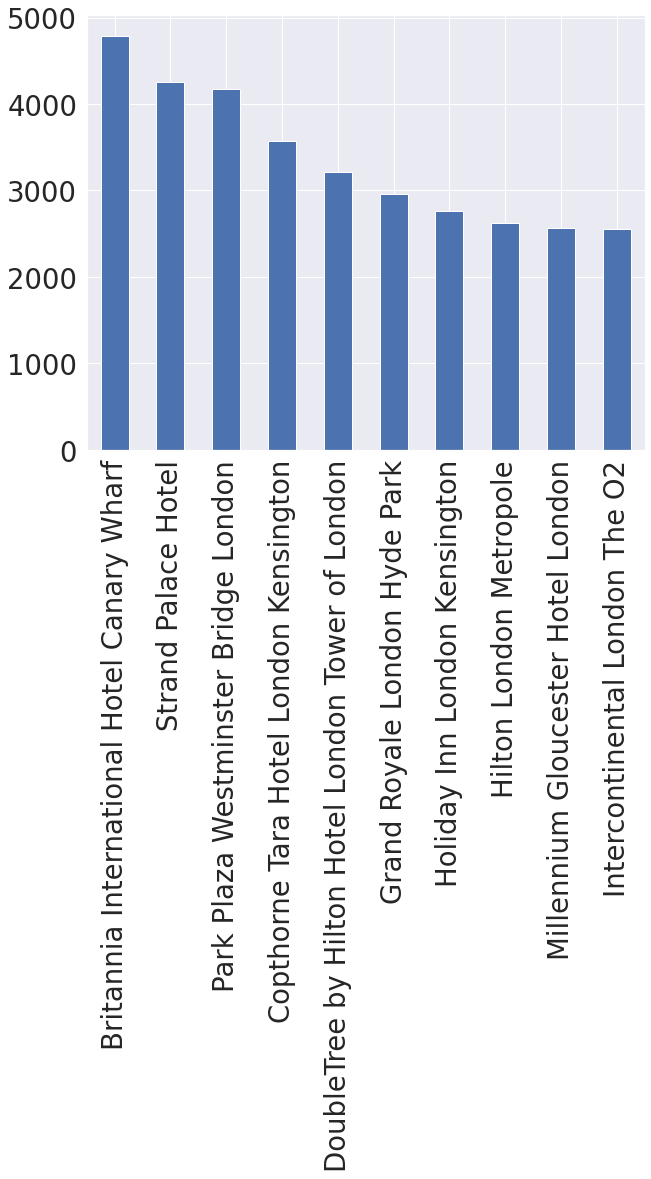

In [47]:
# Let's look at the top 10 reviewed Hotels
Hotel_Name_count = df.Hotel_Name.value_counts()
Hotel_Name_count[:10].plot(kind='bar',figsize=(10,8))

* **Based on the Average Score**

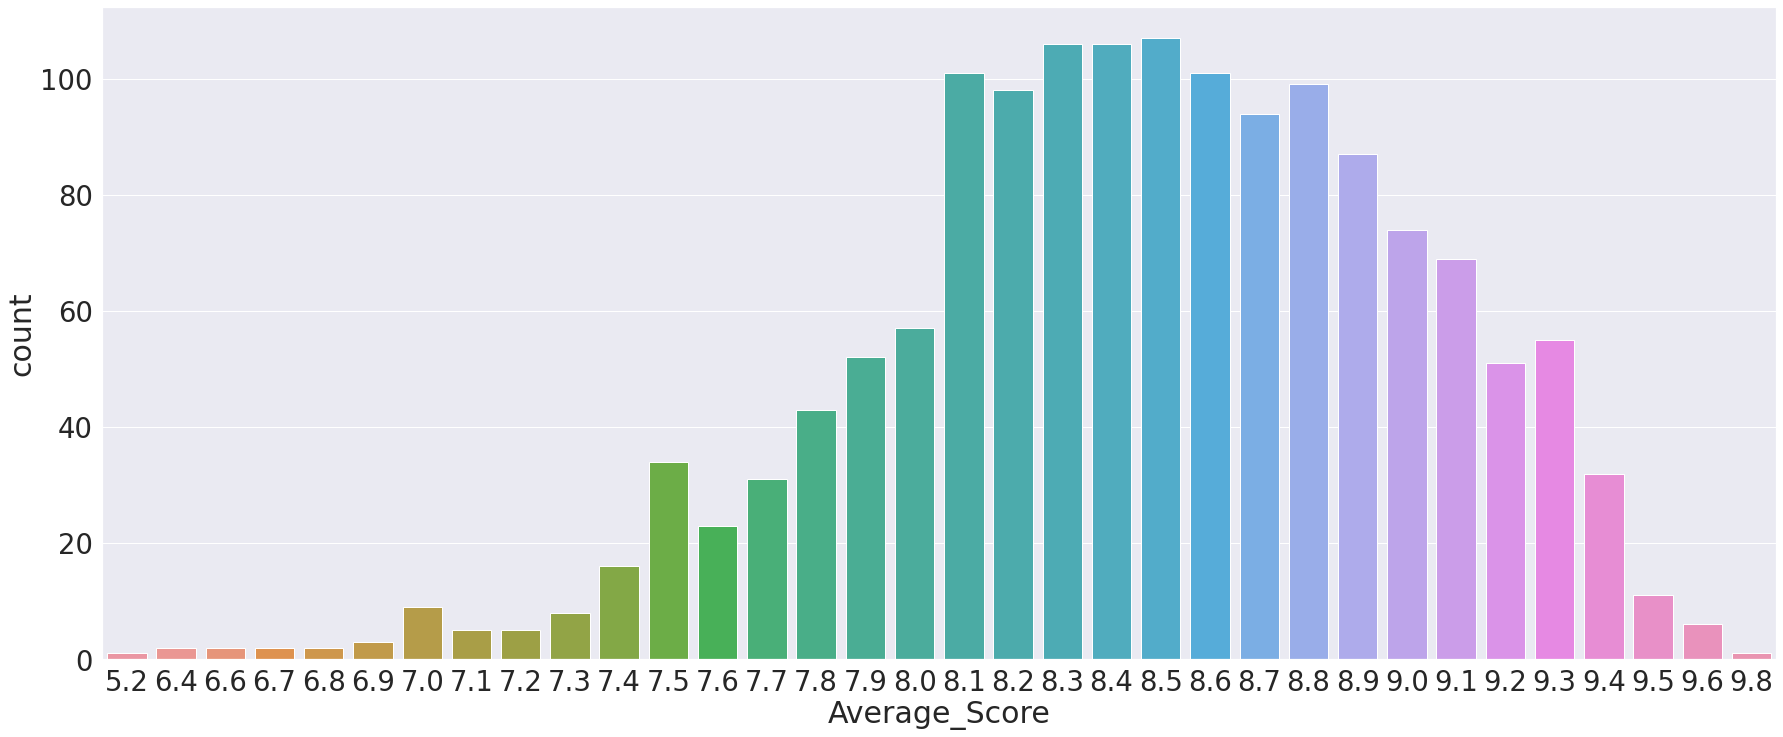

In [48]:
rcParams['figure.figsize'] = 50, 18
rcParams['axes.labelsize'] = 14

data_plot = df[['Hotel_Name', 'Average_Score']].drop_duplicates()
sns.set(font_scale = 2.5)
a4_dims = (30, 12)
fig, ax = pyplot.subplots(figsize = a4_dims)
sns.countplot(ax = ax, x = 'Average_Score', data = data_plot)

According to this visualization we can say most of the average scores lie in the range of 8.0 and 9.1.

* **Based on the Review Nationality**

In [49]:
text = ""
for i in range(df.shape[0]):
    text = " ".join([text,df["Reviewer_Nationality"].values[i]])

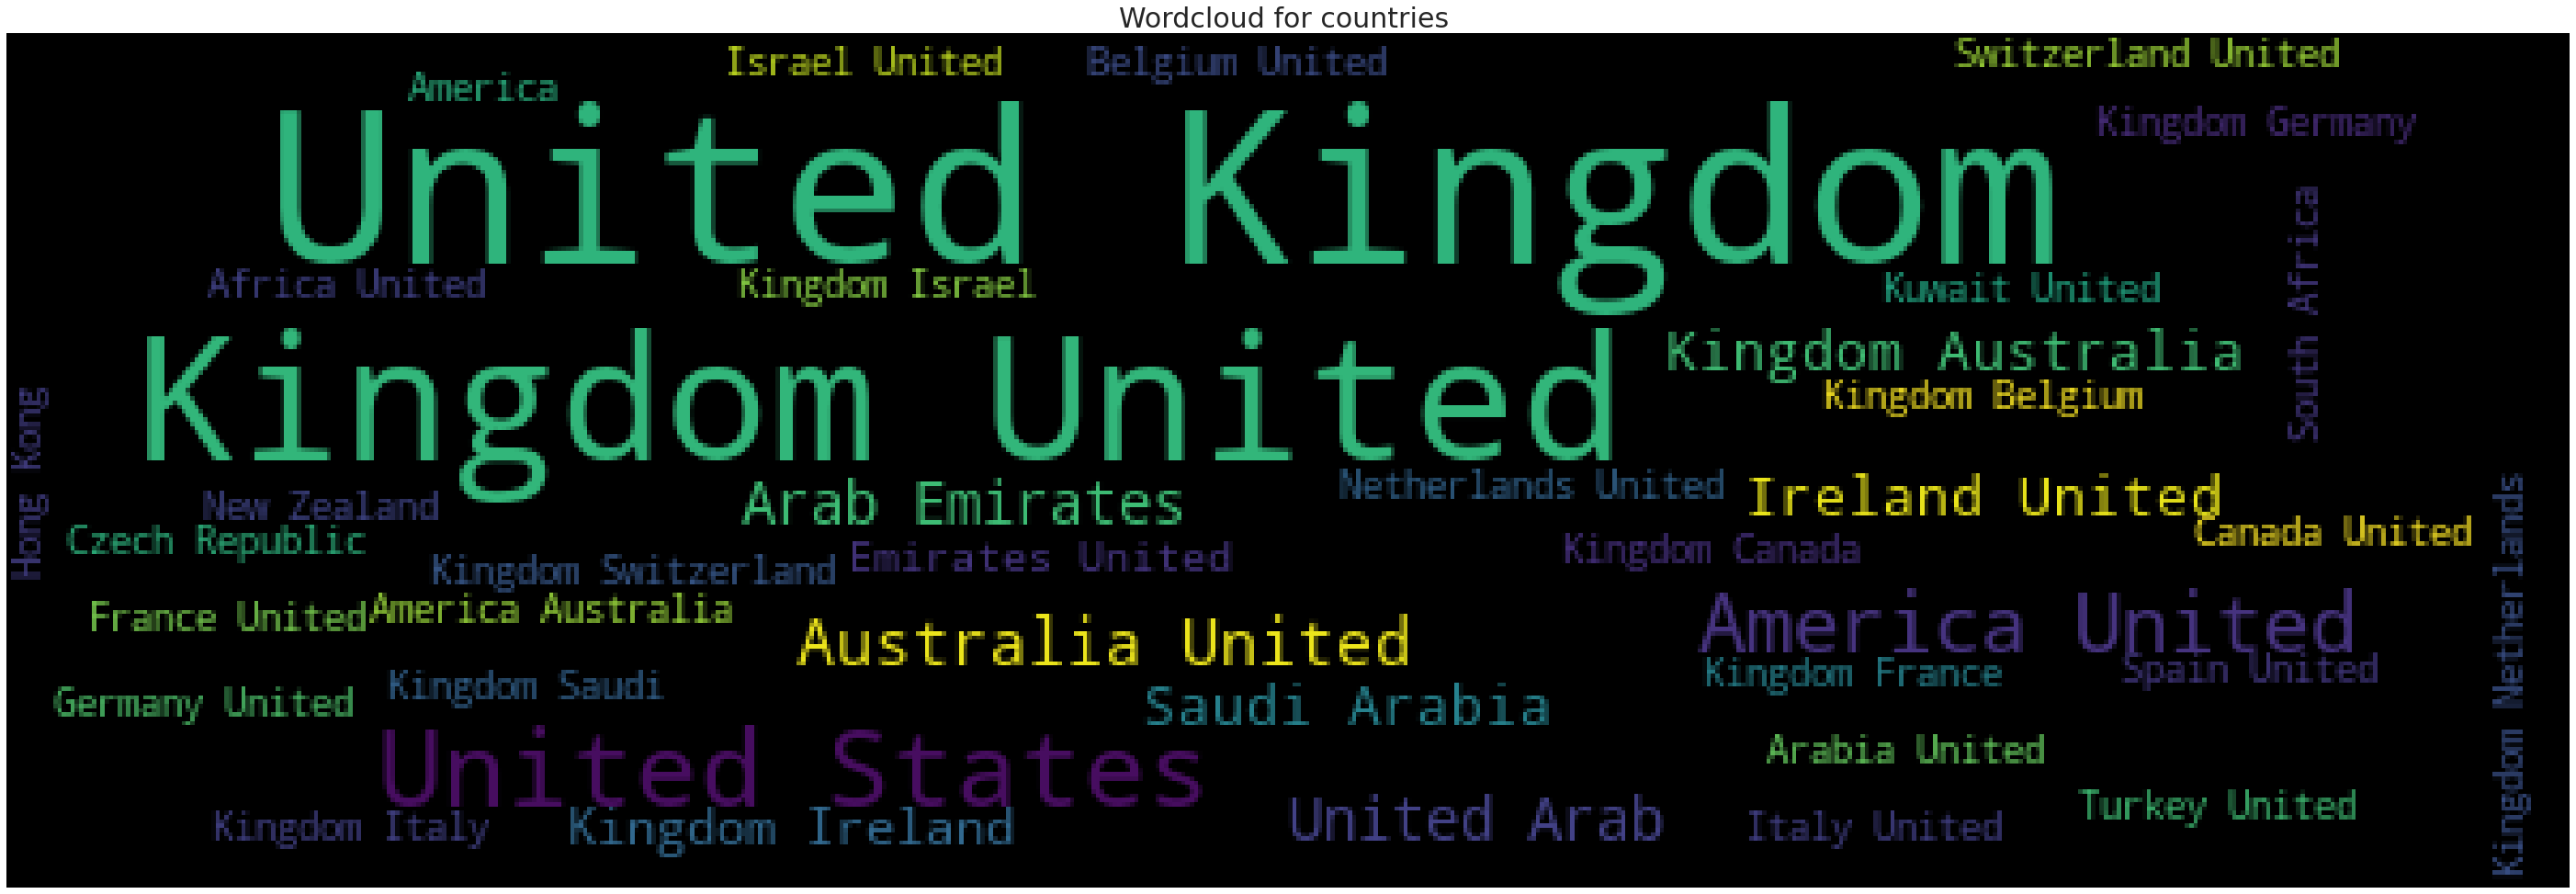

In [50]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='black', width = 600,\
                      height=200, max_font_size=50, max_words=40).generate(text)
wordcloud.recolor(random_state=312)
plt.imshow(wordcloud)
plt.title("Wordcloud for countries ")
plt.axis("off")
plt.show()

In [51]:
df.Reviewer_Nationality.describe()

count               515212
unique                 227
top        United Kingdom 
freq                245110
Name: Reviewer_Nationality, dtype: object

In [52]:
# Let's look at the Top 10 Reviewer's Nationalities
Reviewer_Nat_Count = df.Reviewer_Nationality.value_counts()
print(Reviewer_Nat_Count[:10])

 United Kingdom               245110
 United States of America      35349
 Australia                     21648
 Ireland                       14814
 United Arab Emirates          10229
 Saudi Arabia                   8940
 Netherlands                    8757
 Switzerland                    8669
 Germany                        7929
 Canada                         7883
Name: Reviewer_Nationality, dtype: int64


* **Based on the Review Date**

In [53]:
df.Review_Date.describe()

count       515212
unique         731
top       8/2/2017
freq          2584
Name: Review_Date, dtype: object

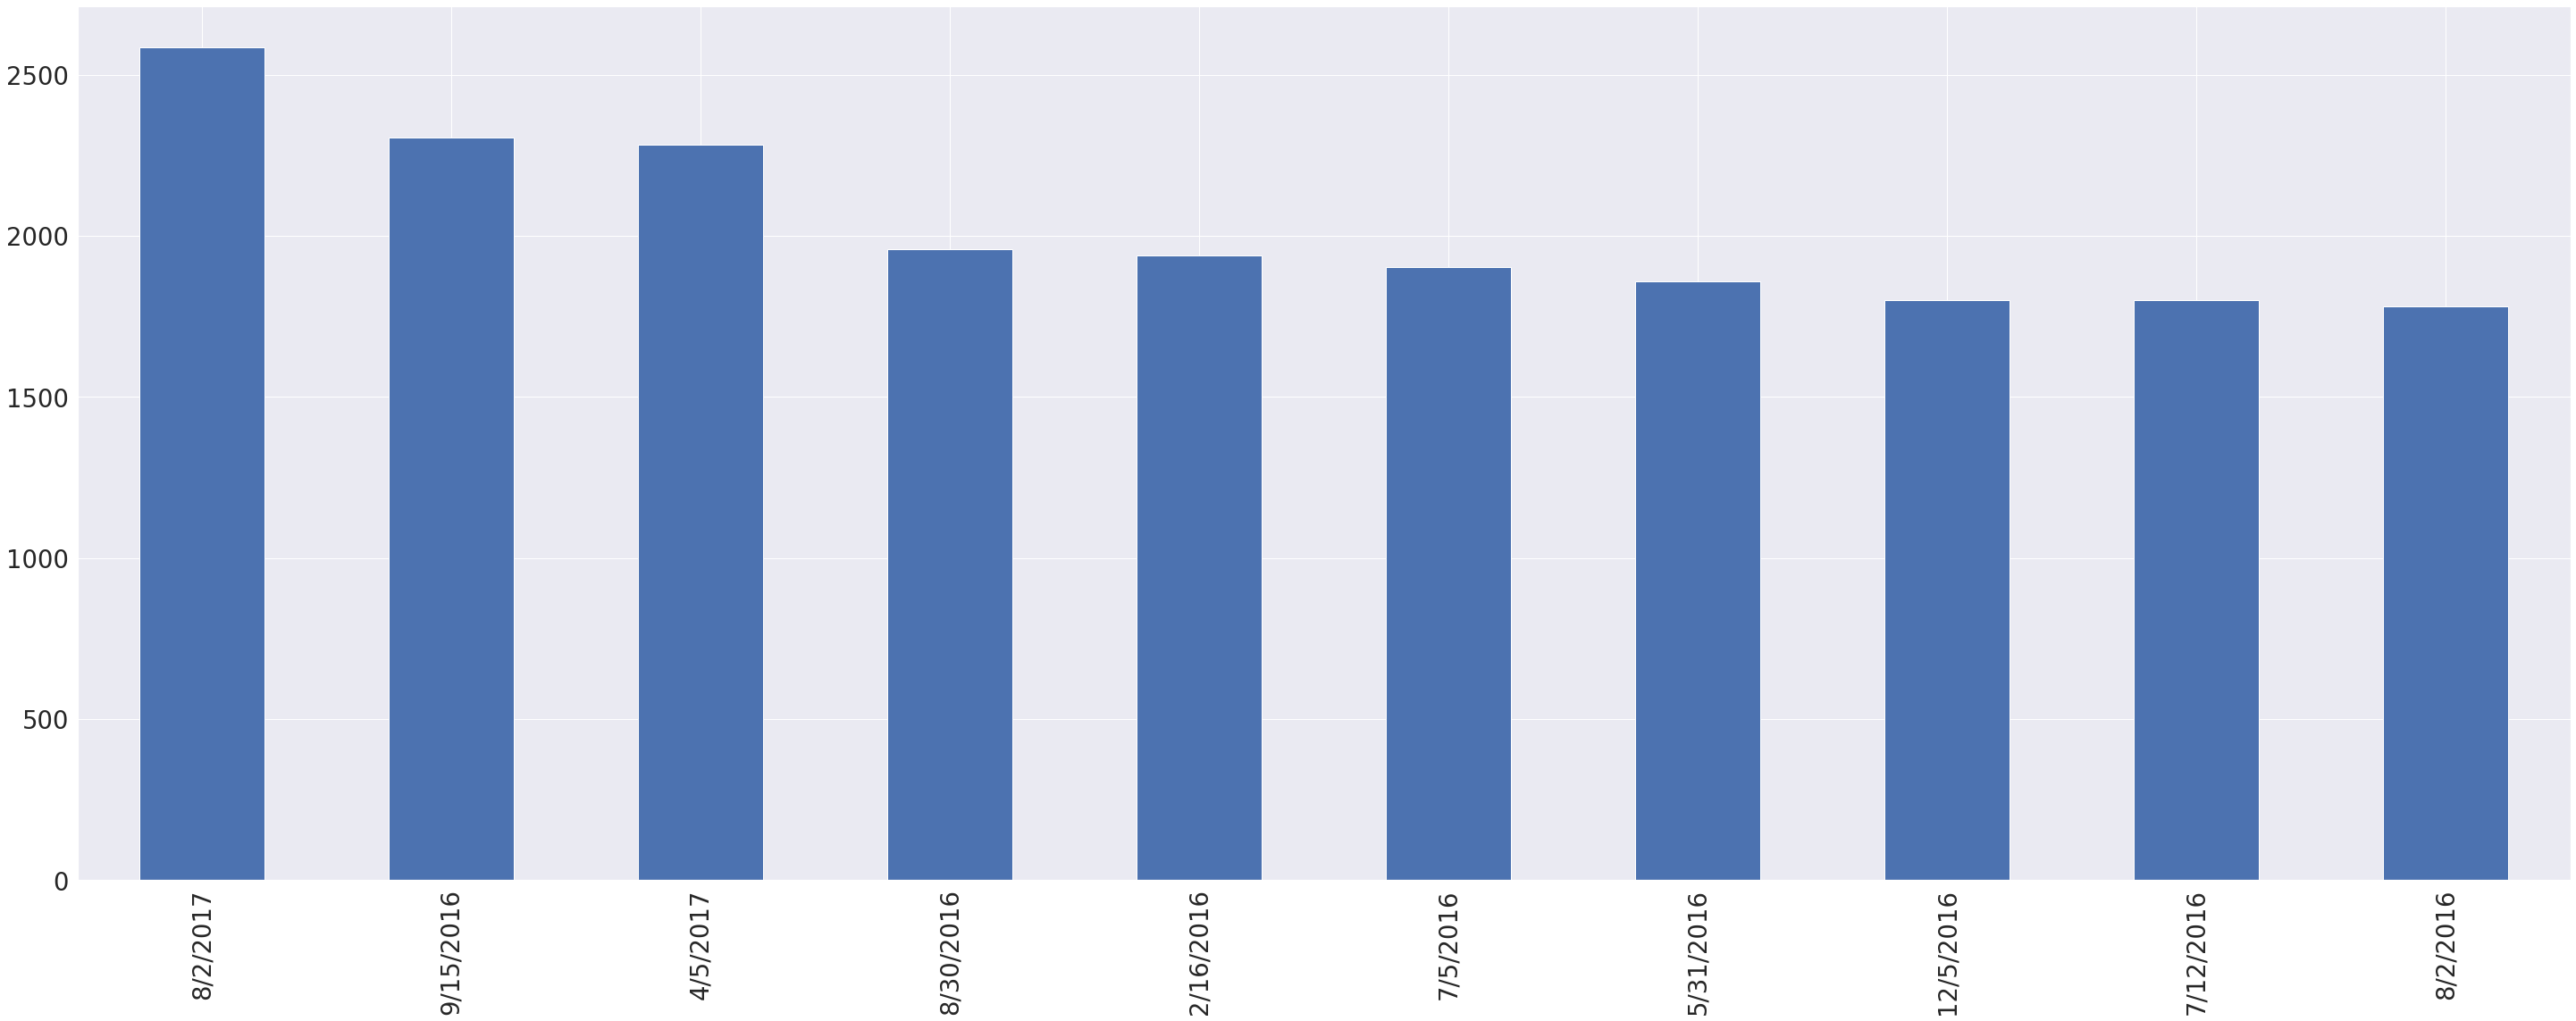

In [54]:
# Let's look at the top 10 Reviews given dates
Review_Date_count = df.Review_Date.value_counts()
Review_Date_count[:10].plot(kind='bar')

* **Based on the Total Number of Reviews Reveiwer Has Given**

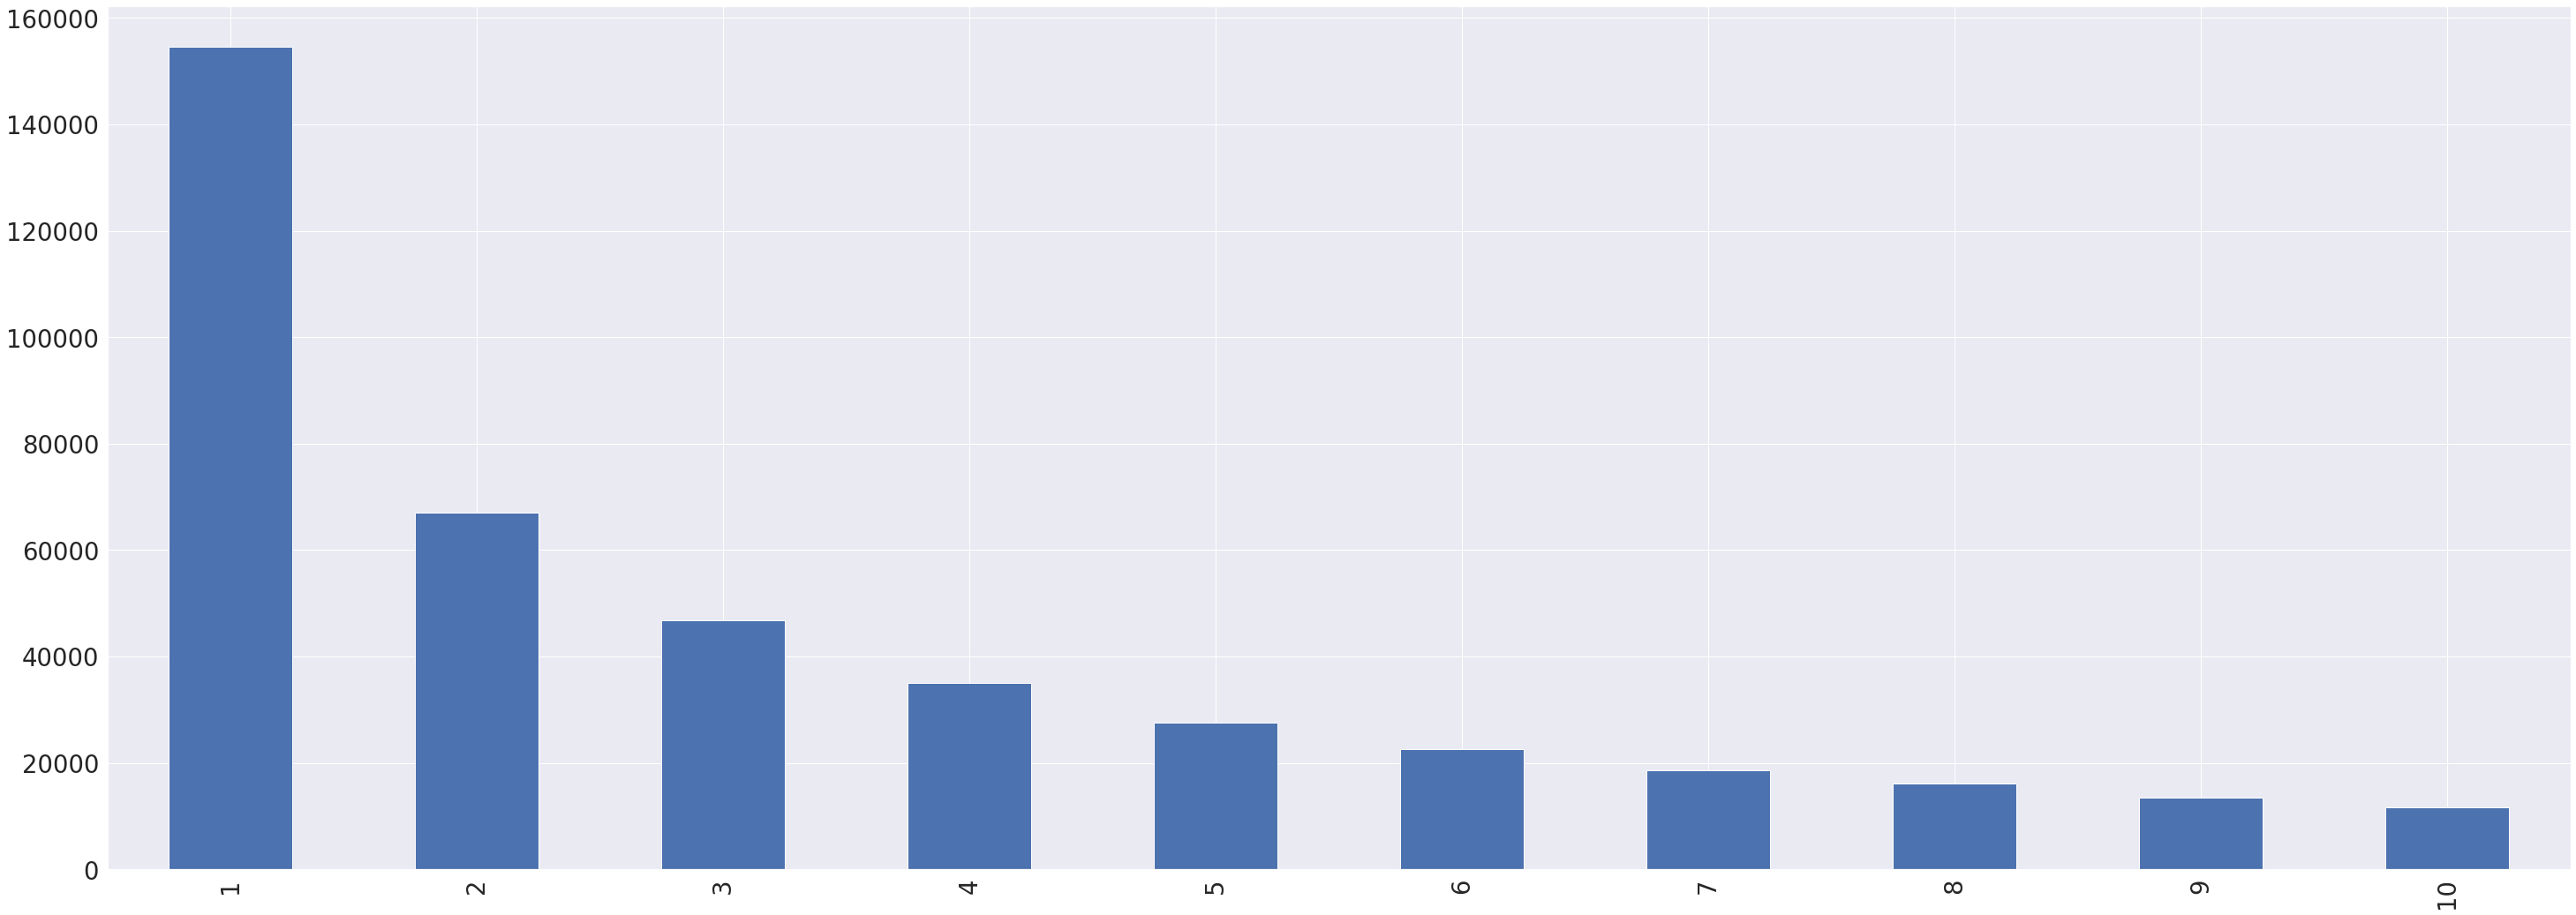

In [55]:
Reviewers_freq = df.Total_Number_of_Reviews_Reviewer_Has_Given.value_counts()
Reviewers_freq[:10].plot(kind='bar')

In [56]:
Reviewers_freq[:10]

1     154506
2      67011
3      46802
4      34991
5      27604
6      22593
7      18599
8      16126
9      13526
10     11702
Name: Total_Number_of_Reviews_Reviewer_Has_Given, dtype: int64

Let's plot a interactive map visualitation inorder to see where the Hotels are located using lat,lng information.¶
we are using the beautiful map visualization library called folium. (if you want to know more about folium library check out this link https://media.readthedocs.org/pdf/folium/latest/folium.pdf )

In [57]:
#Loading the unique Hotel's information to plot them on the map
temp_df = df.drop_duplicates(['Hotel_Name'])
len(temp_df)

1492

In [58]:
map_osm = folium.Map(location=[47, 6], zoom_start=5, tiles = 'Stamen Toner' )

temp_df.apply(lambda row:folium.Marker(location=[row["lat"], row["lng"]])
                                             .add_to(map_osm), axis=1)

map_osm

* **Based on the Review Total Positive Words Counts**

In [59]:
pos_words = df.Review_Total_Positive_Word_Counts.value_counts()
pos_words[:10]

0     35904
6     26887
5     26809
4     24624
7     24517
8     23219
3     22505
9     21188
2     20905
10    19597
Name: Review_Total_Positive_Word_Counts, dtype: int64

In [60]:
a = df.loc[df.Review_Total_Positive_Word_Counts == 0]
print('No of completely Negative reviews in the dataset:',len(a))
b = a[['Positive_Review','Negative_Review']]
b[:10]

No of completely Negative reviews in the dataset: 35904


,Positive_Review,Negative_Review
8,No Positive,Even though the pictures show very clean room...
32,No Positive,Our bathroom had an urine order Shower was ve...
98,No Positive,Got charged 50 for a birthday package when it...
121,No Positive,The first room had steep steps to a loft bed ...
134,No Positive,Foyer was a mess Only place to relax was the ...
146,No Positive,We booked a 3 night stay in a suite On arriva...
169,No Positive,Nothing One Of The Receptionist she did a rac...
172,No Positive,Hotel under sonstruction which we weren t awa...
202,No Positive,Renovation around the hotel sometimes can sta...
209,No Positive,Not given the room type we had booked and pre...


* **Based on the Review Total Negative Word Counts**

In [61]:
neg_words = df.Review_Total_Negative_Word_Counts.value_counts()
neg_words[:10]

0     127757
2      24631
3      18126
6      17726
5      16788
7      16123
4      15049
8      14709
9      13623
10     12409
Name: Review_Total_Negative_Word_Counts, dtype: int64

In [62]:
a = df.loc[df.Review_Total_Negative_Word_Counts == 0 ]
print('No of completely positive reviews in the dataset:',len(a))
b = a[['Positive_Review','Negative_Review']]
b[:10]

No of completely positive reviews in the dataset: 127757


,Positive_Review,Negative_Review
1,No real complaints the hotel was great great ...,No Negative
13,This hotel is being renovated with great care...,No Negative
15,This hotel is awesome I took it sincirely bec...,No Negative
18,Public areas are lovely and the room was nice...,No Negative
48,The quality of the hotel was brilliant and ev...,No Negative
53,Beautiful setting in a lovely park room very ...,No Negative
55,The hotel is lovely and the staff were amazin...,No Negative
59,Basically everything The style of the hotel i...,No Negative
75,The whole hotel was very clean the staff were...,No Negative
78,Hotel was really nice staff were very friendl...,No Negative


# **NLP ANALYSIS**

Sentiment analysis is part of the Natural Language Processing (NLP) techniques that consists in extracting emotions related to some raw texts. So we gonna gain information from customer reviews with this technique.

We'll use these usefull libraries;

* NLTK: the most famous python module for NLP techniques
* Gensim: a topic-modelling and vector space modelling toolkit
* Scikit-learn: the most used python machine learning library

In [63]:
# append the positive and negative text reviews
df["review"] = df["Negative_Review"] + df["Positive_Review"]
# create the label
df["is_bad_review"] = df["Reviewer_Score"].apply(lambda x: 1 if x < 5 else 0)
# select only relevant columns
reviews_df = df[["review", "is_bad_review"]]
reviews_df.head()

,review,is_bad_review
0,I am so angry that i made this post available...,1
1,No Negative No real complaints the hotel was g...,0
2,Rooms are nice but for elderly a bit difficul...,0
3,My room was dirty and I was afraid to walk ba...,1
4,You When I booked with your company on line y...,0


In [64]:
reviews_df = reviews_df.sample(frac = 0.1, replace = False, random_state=42)

In [65]:
# remove 'No Negative' or 'No Positive' from text
reviews_df["review"] = reviews_df["review"].apply(lambda x: x.replace("No Negative", "").replace("No Positive", ""))

In [68]:
# return the wordnet object value corresponding to the POS tag

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
    
    
def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
reviews_df["review_clean"] = reviews_df["review"].apply(lambda x: clean_text(x))

To clean textual data, we call our custom 'clean_text' function that performs several transformations:

* lower the text
* tokenize the text (split the text into words) and remove the punctuation
* remove useless words that contain numbers
* remove useless stop words like 'the', 'a' ,'this' etc.
* Part-Of-Speech (POS) tagging: assign a tag to every word to define if it corresponds to a noun, a verb etc. using the WordNet lexical database
* lemmatize the text: transform every word into their root form (e.g. rooms -> room, slept -> sleep)

Now that we have cleaned our data, we can do some feature engineering for our modelization part.

# **Feature Engineering**

we wanted to add country column for the data so:

In [69]:
# Countries are taken from the link below
# https://gist.github.com/Desperado/3293395#file-countryinfo-py
countries = [
{'timezones': ['Europe/Andorra'], 'code': 'AD', 'continent': 'Europe', 'name': 'Andorra', 'capital': 'Andorra la Vella'},
{'timezones': ['Asia/Kabul'], 'code': 'AF', 'continent': 'Asia', 'name': 'Afghanistan', 'capital': 'Kabul'},
{'timezones': ['America/Antigua'], 'code': 'AG', 'continent': 'North America', 'name': 'Antigua and Barbuda', 'capital': "St. John's"},
{'timezones': ['Europe/Tirane'], 'code': 'AL', 'continent': 'Europe', 'name': 'Albania', 'capital': 'Tirana'},
{'timezones': ['Asia/Yerevan'], 'code': 'AM', 'continent': 'Asia', 'name': 'Armenia', 'capital': 'Yerevan'},
{'timezones': ['Africa/Luanda'], 'code': 'AO', 'continent': 'Africa', 'name': 'Angola', 'capital': 'Luanda'},
{'timezones': ['America/Argentina/Buenos_Aires', 'America/Argentina/Cordoba', 'America/Argentina/Jujuy', 'America/Argentina/Tucuman', 'America/Argentina/Catamarca', 'America/Argentina/La_Rioja', 'America/Argentina/San_Juan', 'America/Argentina/Mendoza', 'America/Argentina/Rio_Gallegos', 'America/Argentina/Ushuaia'], 'code': 'AR', 'continent': 'South America', 'name': 'Argentina', 'capital': 'Buenos Aires'},
{'timezones': ['Europe/Vienna'], 'code': 'AT', 'continent': 'Europe', 'name': 'Austria', 'capital': 'Vienna'},
{'timezones': ['Australia/Lord_Howe', 'Australia/Hobart', 'Australia/Currie', 'Australia/Melbourne', 'Australia/Sydney', 'Australia/Broken_Hill', 'Australia/Brisbane', 'Australia/Lindeman', 'Australia/Adelaide', 'Australia/Darwin', 'Australia/Perth'], 'code': 'AU', 'continent': 'Oceania', 'name': 'Australia', 'capital': 'Canberra'},
{'timezones': ['Asia/Baku'], 'code': 'AZ', 'continent': 'Asia', 'name': 'Azerbaijan', 'capital': 'Baku'},
{'timezones': ['America/Barbados'], 'code': 'BB', 'continent': 'North America', 'name': 'Barbados', 'capital': 'Bridgetown'},
{'timezones': ['Asia/Dhaka'], 'code': 'BD', 'continent': 'Asia', 'name': 'Bangladesh', 'capital': 'Dhaka'},
{'timezones': ['Europe/Brussels'], 'code': 'BE', 'continent': 'Europe', 'name': 'Belgium', 'capital': 'Brussels'},
{'timezones': ['Africa/Ouagadougou'], 'code': 'BF', 'continent': 'Africa', 'name': 'Burkina Faso', 'capital': 'Ouagadougou'},
{'timezones': ['Europe/Sofia'], 'code': 'BG', 'continent': 'Europe', 'name': 'Bulgaria', 'capital': 'Sofia'},
{'timezones': ['Asia/Bahrain'], 'code': 'BH', 'continent': 'Asia', 'name': 'Bahrain', 'capital': 'Manama'},
{'timezones': ['Africa/Bujumbura'], 'code': 'BI', 'continent': 'Africa', 'name': 'Burundi', 'capital': 'Bujumbura'},
{'timezones': ['Africa/Porto-Novo'], 'code': 'BJ', 'continent': 'Africa', 'name': 'Benin', 'capital': 'Porto-Novo'},
{'timezones': ['Asia/Brunei'], 'code': 'BN', 'continent': 'Asia', 'name': 'Brunei Darussalam', 'capital': 'Bandar Seri Begawan'},
{'timezones': ['America/La_Paz'], 'code': 'BO', 'continent': 'South America', 'name': 'Bolivia', 'capital': 'Sucre'},
{'timezones': ['America/Noronha', 'America/Belem', 'America/Fortaleza', 'America/Recife', 'America/Araguaina', 'America/Maceio', 'America/Bahia', 'America/Sao_Paulo', 'America/Campo_Grande', 'America/Cuiaba', 'America/Porto_Velho', 'America/Boa_Vista', 'America/Manaus', 'America/Eirunepe', 'America/Rio_Branco'], 'code': 'BR', 'continent': 'South America', 'name': 'Brazil', 'capital': 'Bras\xc3\xadlia'},
{'timezones': ['America/Nassau'], 'code': 'BS', 'continent': 'North America', 'name': 'Bahamas', 'capital': 'Nassau'},
{'timezones': ['Asia/Thimphu'], 'code': 'BT', 'continent': 'Asia', 'name': 'Bhutan', 'capital': 'Thimphu'},
{'timezones': ['Africa/Gaborone'], 'code': 'BW', 'continent': 'Africa', 'name': 'Botswana', 'capital': 'Gaborone'},
{'timezones': ['Europe/Minsk'], 'code': 'BY', 'continent': 'Europe', 'name': 'Belarus', 'capital': 'Minsk'},
{'timezones': ['America/Belize'], 'code': 'BZ', 'continent': 'North America', 'name': 'Belize', 'capital': 'Belmopan'},
{'timezones': ['America/St_Johns', 'America/Halifax', 'America/Glace_Bay', 'America/Moncton', 'America/Goose_Bay', 'America/Blanc-Sablon', 'America/Montreal', 'America/Toronto', 'America/Nipigon', 'America/Thunder_Bay', 'America/Pangnirtung', 'America/Iqaluit', 'America/Atikokan', 'America/Rankin_Inlet', 'America/Winnipeg', 'America/Rainy_River', 'America/Cambridge_Bay', 'America/Regina', 'America/Swift_Current', 'America/Edmonton', 'America/Yellowknife', 'America/Inuvik', 'America/Dawson_Creek', 'America/Vancouver', 'America/Whitehorse', 'America/Dawson'], 'code': 'CA', 'continent': 'North America', 'name': 'Canada', 'capital': 'Ottawa'},
{'timezones': ['Africa/Kinshasa', 'Africa/Lubumbashi'], 'code': 'CD', 'continent': 'Africa', 'name': 'Democratic Republic of the Congo', 'capital': 'Kinshasa'},
{'timezones': ['Africa/Brazzaville'], 'code': 'CG', 'continent': 'Africa', 'name': 'Republic of the Congo', 'capital': 'Brazzaville'},
{'timezones': ['Africa/Abidjan'], 'code': 'CI', 'continent': 'Africa', 'name': "C\xc3\xb4te d'Ivoire", 'capital': 'Yamoussoukro'},
{'timezones': ['America/Santiago', 'Pacific/Easter'], 'code': 'CL', 'continent': 'South America', 'name': 'Chile', 'capital': 'Santiago'},
{'timezones': ['Africa/Douala'], 'code': 'CM', 'continent': 'Africa', 'name': 'Cameroon', 'capital': 'Yaound\xc3\xa9'},
{'timezones': ['Asia/Shanghai', 'Asia/Harbin', 'Asia/Chongqing', 'Asia/Urumqi', 'Asia/Kashgar'], 'code': 'CN', 'continent': 'Asia', 'name': "People's Republic of China", 'capital': 'Beijing'},
{'timezones': ['America/Bogota'], 'code': 'CO', 'continent': 'South America', 'name': 'Colombia', 'capital': 'Bogot\xc3\xa1'},
{'timezones': ['America/Costa_Rica'], 'code': 'CR', 'continent': 'North America', 'name': 'Costa Rica', 'capital': 'San Jos\xc3\xa9'},
{'timezones': ['America/Havana'], 'code': 'CU', 'continent': 'North America', 'name': 'Cuba', 'capital': 'Havana'},
{'timezones': ['Atlantic/Cape_Verde'], 'code': 'CV', 'continent': 'Africa', 'name': 'Cape Verde', 'capital': 'Praia'},
{'timezones': ['Asia/Nicosia'], 'code': 'CY', 'continent': 'Asia', 'name': 'Cyprus', 'capital': 'Nicosia'},
{'timezones': ['Europe/Prague'], 'code': 'CZ', 'continent': 'Europe', 'name': 'Czech Republic', 'capital': 'Prague'},
{'timezones': ['Europe/Berlin'], 'code': 'DE', 'continent': 'Europe', 'name': 'Germany', 'capital': 'Berlin'},
{'timezones': ['Africa/Djibouti'], 'code': 'DJ', 'continent': 'Africa', 'name': 'Djibouti', 'capital': 'Djibouti City'},
{'timezones': ['Europe/Copenhagen'], 'code': 'DK', 'continent': 'Europe', 'name': 'Denmark', 'capital': 'Copenhagen'},
{'timezones': ['America/Dominica'], 'code': 'DM', 'continent': 'North America', 'name': 'Dominica', 'capital': 'Roseau'},
{'timezones': ['America/Santo_Domingo'], 'code': 'DO', 'continent': 'North America', 'name': 'Dominican Republic', 'capital': 'Santo Domingo'},
{'timezones': ['America/Guayaquil', 'Pacific/Galapagos'], 'code': 'EC', 'continent': 'South America', 'name': 'Ecuador', 'capital': 'Quito'},
{'timezones': ['Europe/Tallinn'], 'code': 'EE', 'continent': 'Europe', 'name': 'Estonia', 'capital': 'Tallinn'},
{'timezones': ['Africa/Cairo'], 'code': 'EG', 'continent': 'Africa', 'name': 'Egypt', 'capital': 'Cairo'},
{'timezones': ['Africa/Asmera'], 'code': 'ER', 'continent': 'Africa', 'name': 'Eritrea', 'capital': 'Asmara'},
{'timezones': ['Africa/Addis_Ababa'], 'code': 'ET', 'continent': 'Africa', 'name': 'Ethiopia', 'capital': 'Addis Ababa'},
{'timezones': ['Europe/Helsinki'], 'code': 'FI', 'continent': 'Europe', 'name': 'Finland', 'capital': 'Helsinki'},
{'timezones': ['Pacific/Fiji'], 'code': 'FJ', 'continent': 'Oceania', 'name': 'Fiji', 'capital': 'Suva'},
{'timezones': ['Europe/Paris'], 'code': 'FR', 'continent': 'Europe', 'name': 'France', 'capital': 'Paris'},
{'timezones': ['Africa/Libreville'], 'code': 'GA', 'continent': 'Africa', 'name': 'Gabon', 'capital': 'Libreville'},
{'timezones': ['Asia/Tbilisi'], 'code': 'GE', 'continent': 'Asia', 'name': 'Georgia', 'capital': 'Tbilisi'},
{'timezones': ['Africa/Accra'], 'code': 'GH', 'continent': 'Africa', 'name': 'Ghana', 'capital': 'Accra'},
{'timezones': ['Africa/Banjul'], 'code': 'GM', 'continent': 'Africa', 'name': 'The Gambia', 'capital': 'Banjul'},
{'timezones': ['Africa/Conakry'], 'code': 'GN', 'continent': 'Africa', 'name': 'Guinea', 'capital': 'Conakry'},
{'timezones': ['Europe/Athens'], 'code': 'GR', 'continent': 'Europe', 'name': 'Greece', 'capital': 'Athens'},
{'timezones': ['America/Guatemala'], 'code': 'GT', 'continent': 'North America', 'name': 'Guatemala', 'capital': 'Guatemala City'},
{'timezones': ['America/Guatemala'], 'code': 'GT', 'continent': 'North America', 'name': 'Haiti', 'capital': 'Port-au-Prince'},
{'timezones': ['Africa/Bissau'], 'code': 'GW', 'continent': 'Africa', 'name': 'Guinea-Bissau', 'capital': 'Bissau'},
{'timezones': ['America/Guyana'], 'code': 'GY', 'continent': 'South America', 'name': 'Guyana', 'capital': 'Georgetown'},
{'timezones': ['America/Tegucigalpa'], 'code': 'HN', 'continent': 'North America', 'name': 'Honduras', 'capital': 'Tegucigalpa'},
{'timezones': ['Europe/Budapest'], 'code': 'HU', 'continent': 'Europe', 'name': 'Hungary', 'capital': 'Budapest'},
{'timezones': ['Asia/Jakarta', 'Asia/Pontianak', 'Asia/Makassar', 'Asia/Jayapura'], 'code': 'ID', 'continent': 'Asia', 'name': 'Indonesia', 'capital': 'Jakarta'},
{'timezones': ['Europe/Dublin'], 'code': 'IE', 'continent': 'Europe', 'name': 'Republic of Ireland', 'capital': 'Dublin'},
{'timezones': ['Asia/Jerusalem'], 'code': 'IL', 'continent': 'Asia', 'name': 'Israel', 'capital': 'Jerusalem'},
{'timezones': ['Asia/Calcutta'], 'code': 'IN', 'continent': 'Asia', 'name': 'India', 'capital': 'New Delhi'},
{'timezones': ['Asia/Baghdad'], 'code': 'IQ', 'continent': 'Asia', 'name': 'Iraq', 'capital': 'Baghdad'},
{'timezones': ['Asia/Tehran'], 'code': 'IR', 'continent': 'Asia', 'name': 'Iran', 'capital': 'Tehran'},
{'timezones': ['Atlantic/Reykjavik'], 'code': 'IS', 'continent': 'Europe', 'name': 'Iceland', 'capital': 'Reykjav\xc3\xadk'},
{'timezones': ['Europe/Rome'], 'code': 'IT', 'continent': 'Europe', 'name': 'Italy', 'capital': 'Rome'},
{'timezones': ['America/Jamaica'], 'code': 'JM', 'continent': 'North America', 'name': 'Jamaica', 'capital': 'Kingston'},
{'timezones': ['Asia/Amman'], 'code': 'JO', 'continent': 'Asia', 'name': 'Jordan', 'capital': 'Amman'},
{'timezones': ['Asia/Tokyo'], 'code': 'JP', 'continent': 'Asia', 'name': 'Japan', 'capital': 'Tokyo'},
{'timezones': ['Africa/Nairobi'], 'code': 'KE', 'continent': 'Africa', 'name': 'Kenya', 'capital': 'Nairobi'},
{'timezones': ['Asia/Bishkek'], 'code': 'KG', 'continent': 'Asia', 'name': 'Kyrgyzstan', 'capital': 'Bishkek'},
{'timezones': ['Pacific/Tarawa', 'Pacific/Enderbury', 'Pacific/Kiritimati'], 'code': 'KI', 'continent': 'Oceania', 'name': 'Kiribati', 'capital': 'Tarawa'},
{'timezones': ['Asia/Pyongyang'], 'code': 'KP', 'continent': 'Asia', 'name': 'North Korea', 'capital': 'Pyongyang'},
{'timezones': ['Asia/Seoul'], 'code': 'KR', 'continent': 'Asia', 'name': 'South Korea', 'capital': 'Seoul'},
{'timezones': ['Asia/Kuwait'], 'code': 'KW', 'continent': 'Asia', 'name': 'Kuwait', 'capital': 'Kuwait City'},
{'timezones': ['Asia/Beirut'], 'code': 'LB', 'continent': 'Asia', 'name': 'Lebanon', 'capital': 'Beirut'},
{'timezones': ['Europe/Vaduz'], 'code': 'LI', 'continent': 'Europe', 'name': 'Liechtenstein', 'capital': 'Vaduz'},
{'timezones': ['Africa/Monrovia'], 'code': 'LR', 'continent': 'Africa', 'name': 'Liberia', 'capital': 'Monrovia'},
{'timezones': ['Africa/Maseru'], 'code': 'LS', 'continent': 'Africa', 'name': 'Lesotho', 'capital': 'Maseru'},
{'timezones': ['Europe/Vilnius'], 'code': 'LT', 'continent': 'Europe', 'name': 'Lithuania', 'capital': 'Vilnius'},
{'timezones': ['Europe/Luxembourg'], 'code': 'LU', 'continent': 'Europe', 'name': 'Luxembourg', 'capital': 'Luxembourg City'},
{'timezones': ['Europe/Riga'], 'code': 'LV', 'continent': 'Europe', 'name': 'Latvia', 'capital': 'Riga'},
{'timezones': ['Africa/Tripoli'], 'code': 'LY', 'continent': 'Africa', 'name': 'Libya', 'capital': 'Tripoli'},
{'timezones': ['Indian/Antananarivo'], 'code': 'MG', 'continent': 'Africa', 'name': 'Madagascar', 'capital': 'Antananarivo'},
{'timezones': ['Pacific/Majuro', 'Pacific/Kwajalein'], 'code': 'MH', 'continent': 'Oceania', 'name': 'Marshall Islands', 'capital': 'Majuro'},
{'timezones': ['Europe/Skopje'], 'code': 'MK', 'continent': 'Europe', 'name': 'Macedonia', 'capital': 'Skopje'},
{'timezones': ['Africa/Bamako'], 'code': 'ML', 'continent': 'Africa', 'name': 'Mali', 'capital': 'Bamako'},
{'timezones': ['Asia/Rangoon'], 'code': 'MM', 'continent': 'Asia', 'name': 'Myanmar', 'capital': 'Naypyidaw'},
{'timezones': ['Asia/Ulaanbaatar', 'Asia/Hovd', 'Asia/Choibalsan'], 'code': 'MN', 'continent': 'Asia', 'name': 'Mongolia', 'capital': 'Ulaanbaatar'},
{'timezones': ['Africa/Nouakchott'], 'code': 'MR', 'continent': 'Africa', 'name': 'Mauritania', 'capital': 'Nouakchott'},
{'timezones': ['Europe/Malta'], 'code': 'MT', 'continent': 'Europe', 'name': 'Malta', 'capital': 'Valletta'},
{'timezones': ['Indian/Mauritius'], 'code': 'MU', 'continent': 'Africa', 'name': 'Mauritius', 'capital': 'Port Louis'},
{'timezones': ['Indian/Maldives'], 'code': 'MV', 'continent': 'Asia', 'name': 'Maldives', 'capital': 'Mal\xc3\xa9'},
{'timezones': ['Africa/Blantyre'], 'code': 'MW', 'continent': 'Africa', 'name': 'Malawi', 'capital': 'Lilongwe'},
{'timezones': ['America/Mexico_City', 'America/Cancun', 'America/Merida', 'America/Monterrey', 'America/Mazatlan', 'America/Chihuahua', 'America/Hermosillo', 'America/Tijuana'], 'code': 'MX', 'continent': 'North America', 'name': 'Mexico', 'capital': 'Mexico City'},
{'timezones': ['Asia/Kuala_Lumpur', 'Asia/Kuching'], 'code': 'MY', 'continent': 'Asia', 'name': 'Malaysia', 'capital': 'Kuala Lumpur'},
{'timezones': ['Africa/Maputo'], 'code': 'MZ', 'continent': 'Africa', 'name': 'Mozambique', 'capital': 'Maputo'},
{'timezones': ['Africa/Windhoek'], 'code': 'NA', 'continent': 'Africa', 'name': 'Namibia', 'capital': 'Windhoek'},
{'timezones': ['Africa/Niamey'], 'code': 'NE', 'continent': 'Africa', 'name': 'Niger', 'capital': 'Niamey'},
{'timezones': ['Africa/Lagos'], 'code': 'NG', 'continent': 'Africa', 'name': 'Nigeria', 'capital': 'Abuja'},
{'timezones': ['America/Managua'], 'code': 'NI', 'continent': 'North America', 'name': 'Nicaragua', 'capital': 'Managua'},
{'timezones': ['Europe/Amsterdam'], 'code': 'NL', 'continent': 'Europe', 'name': 'Kingdom of the Netherlands', 'capital': 'Amsterdam'},
{'timezones': ['Europe/Oslo'], 'code': 'NO', 'continent': 'Europe', 'name': 'Norway', 'capital': 'Oslo'},
{'timezones': ['Asia/Katmandu'], 'code': 'NP', 'continent': 'Asia', 'name': 'Nepal', 'capital': 'Kathmandu'},
{'timezones': ['Pacific/Nauru'], 'code': 'NR', 'continent': 'Oceania', 'name': 'Nauru', 'capital': 'Yaren'},
{'timezones': ['Pacific/Auckland', 'Pacific/Chatham'], 'code': 'NZ', 'continent': 'Oceania', 'name': 'New Zealand', 'capital': 'Wellington'},
{'timezones': ['Asia/Muscat'], 'code': 'OM', 'continent': 'Asia', 'name': 'Oman', 'capital': 'Muscat'},
{'timezones': ['America/Panama'], 'code': 'PA', 'continent': 'North America', 'name': 'Panama', 'capital': 'Panama City'},
{'timezones': ['America/Lima'], 'code': 'PE', 'continent': 'South America', 'name': 'Peru', 'capital': 'Lima'},
{'timezones': ['Pacific/Port_Moresby'], 'code': 'PG', 'continent': 'Oceania', 'name': 'Papua New Guinea', 'capital': 'Port Moresby'},
{'timezones': ['Asia/Manila'], 'code': 'PH', 'continent': 'Asia', 'name': 'Philippines', 'capital': 'Manila'},
{'timezones': ['Asia/Karachi'], 'code': 'PK', 'continent': 'Asia', 'name': 'Pakistan', 'capital': 'Islamabad'},
{'timezones': ['Europe/Warsaw'], 'code': 'PL', 'continent': 'Europe', 'name': 'Poland', 'capital': 'Warsaw'},
{'timezones': ['Europe/Lisbon', 'Atlantic/Madeira', 'Atlantic/Azores'], 'code': 'PT', 'continent': 'Europe', 'name': 'Portugal', 'capital': 'Lisbon'},
{'timezones': ['Pacific/Palau'], 'code': 'PW', 'continent': 'Oceania', 'name': 'Palau', 'capital': 'Ngerulmud'},
{'timezones': ['America/Asuncion'], 'code': 'PY', 'continent': 'South America', 'name': 'Paraguay', 'capital': 'Asunci\xc3\xb3n'},
{'timezones': ['Asia/Qatar'], 'code': 'QA', 'continent': 'Asia', 'name': 'Qatar', 'capital': 'Doha'},
{'timezones': ['Europe/Bucharest'], 'code': 'RO', 'continent': 'Europe', 'name': 'Romania', 'capital': 'Bucharest'},
{'timezones': ['Europe/Kaliningrad', 'Europe/Moscow', 'Europe/Volgograd', 'Europe/Samara', 'Asia/Yekaterinburg', 'Asia/Omsk', 'Asia/Novosibirsk', 'Asia/Krasnoyarsk', 'Asia/Irkutsk', 'Asia/Yakutsk', 'Asia/Vladivostok', 'Asia/Sakhalin', 'Asia/Magadan', 'Asia/Kamchatka', 'Asia/Anadyr'], 'code': 'RU', 'continent': 'Europe', 'name': 'Russia', 'capital': 'Moscow'},
{'timezones': ['Africa/Kigali'], 'code': 'RW', 'continent': 'Africa', 'name': 'Rwanda', 'capital': 'Kigali'},
{'timezones': ['Asia/Riyadh'], 'code': 'SA', 'continent': 'Asia', 'name': 'Saudi Arabia', 'capital': 'Riyadh'},
{'timezones': ['Pacific/Guadalcanal'], 'code': 'SB', 'continent': 'Oceania', 'name': 'Solomon Islands', 'capital': 'Honiara'},
{'timezones': ['Indian/Mahe'], 'code': 'SC', 'continent': 'Africa', 'name': 'Seychelles', 'capital': 'Victoria'},
{'timezones': ['Africa/Khartoum'], 'code': 'SD', 'continent': 'Africa', 'name': 'Sudan', 'capital': 'Khartoum'},
{'timezones': ['Europe/Stockholm'], 'code': 'SE', 'continent': 'Europe', 'name': 'Sweden', 'capital': 'Stockholm'},
{'timezones': ['Asia/Singapore'], 'code': 'SG', 'continent': 'Asia', 'name': 'Singapore', 'capital': 'Singapore'},
{'timezones': ['Europe/Ljubljana'], 'code': 'SI', 'continent': 'Europe', 'name': 'Slovenia', 'capital': 'Ljubljana'},
{'timezones': ['Europe/Bratislava'], 'code': 'SK', 'continent': 'Europe', 'name': 'Slovakia', 'capital': 'Bratislava'},
{'timezones': ['Africa/Freetown'], 'code': 'SL', 'continent': 'Africa', 'name': 'Sierra Leone', 'capital': 'Freetown'},
{'timezones': ['Europe/San_Marino'], 'code': 'SM', 'continent': 'Europe', 'name': 'San Marino', 'capital': 'San Marino'},
{'timezones': ['Africa/Dakar'], 'code': 'SN', 'continent': 'Africa', 'name': 'Senegal', 'capital': 'Dakar'},
{'timezones': ['Africa/Mogadishu'], 'code': 'SO', 'continent': 'Africa', 'name': 'Somalia', 'capital': 'Mogadishu'},
{'timezones': ['America/Paramaribo'], 'code': 'SR', 'continent': 'South America', 'name': 'Suriname', 'capital': 'Paramaribo'},
{'timezones': ['Africa/Sao_Tome'], 'code': 'ST', 'continent': 'Africa', 'name': 'S\xc3\xa3o Tom\xc3\xa9 and Pr\xc3\xadncipe', 'capital': 'S\xc3\xa3o Tom\xc3\xa9'},
{'timezones': ['Asia/Damascus'], 'code': 'SY', 'continent': 'Asia', 'name': 'Syria', 'capital': 'Damascus'},
{'timezones': ['Africa/Lome'], 'code': 'TG', 'continent': 'Africa', 'name': 'Togo', 'capital': 'Lom\xc3\xa9'},
{'timezones': ['Asia/Bangkok'], 'code': 'TH', 'continent': 'Asia', 'name': 'Thailand', 'capital': 'Bangkok'},
{'timezones': ['Asia/Dushanbe'], 'code': 'TJ', 'continent': 'Asia', 'name': 'Tajikistan', 'capital': 'Dushanbe'},
{'timezones': ['Asia/Ashgabat'], 'code': 'TM', 'continent': 'Asia', 'name': 'Turkmenistan', 'capital': 'Ashgabat'},
{'timezones': ['Africa/Tunis'], 'code': 'TN', 'continent': 'Africa', 'name': 'Tunisia', 'capital': 'Tunis'},
{'timezones': ['Pacific/Tongatapu'], 'code': 'TO', 'continent': 'Oceania', 'name': 'Tonga', 'capital': 'Nuku\xca\xbbalofa'},
{'timezones': ['Europe/Istanbul'], 'code': 'TR', 'continent': 'Asia', 'name': 'Turkey', 'capital': 'Ankara'},
{'timezones': ['America/Port_of_Spain'], 'code': 'TT', 'continent': 'North America', 'name': 'Trinidad and Tobago', 'capital': 'Port of Spain'},
{'timezones': ['Pacific/Funafuti'], 'code': 'TV', 'continent': 'Oceania', 'name': 'Tuvalu', 'capital': 'Funafuti'},
{'timezones': ['Africa/Dar_es_Salaam'], 'code': 'TZ', 'continent': 'Africa', 'name': 'Tanzania', 'capital': 'Dodoma'},
{'timezones': ['Europe/Kiev', 'Europe/Uzhgorod', 'Europe/Zaporozhye', 'Europe/Simferopol'], 'code': 'UA', 'continent': 'Europe', 'name': 'Ukraine', 'capital': 'Kiev'},
{'timezones': ['Africa/Kampala'], 'code': 'UG', 'continent': 'Africa', 'name': 'Uganda', 'capital': 'Kampala'},
{'timezones': ['America/New_York', 'America/Detroit', 'America/Kentucky/Louisville', 'America/Kentucky/Monticello', 'America/Indiana/Indianapolis', 'America/Indiana/Marengo', 'America/Indiana/Knox', 'America/Indiana/Vevay', 'America/Chicago', 'America/Indiana/Vincennes', 'America/Indiana/Petersburg', 'America/Menominee', 'America/North_Dakota/Center', 'America/North_Dakota/New_Salem', 'America/Denver', 'America/Boise', 'America/Shiprock', 'America/Phoenix', 'America/Los_Angeles', 'America/Anchorage', 'America/Juneau', 'America/Yakutat', 'America/Nome', 'America/Adak', 'Pacific/Honolulu'], 'code': 'US', 'continent': 'North America', 'name': 'United States', 'capital': 'Washington, D.C.'},
{'timezones': ['America/Montevideo'], 'code': 'UY', 'continent': 'South America', 'name': 'Uruguay', 'capital': 'Montevideo'},
{'timezones': ['Asia/Samarkand', 'Asia/Tashkent'], 'code': 'UZ', 'continent': 'Asia', 'name': 'Uzbekistan', 'capital': 'Tashkent'},
{'timezones': ['Europe/Vatican'], 'code': 'VA', 'continent': 'Europe', 'name': 'Vatican City', 'capital': 'Vatican City'},
{'timezones': ['America/Caracas'], 'code': 'VE', 'continent': 'South America', 'name': 'Venezuela', 'capital': 'Caracas'},
{'timezones': ['Asia/Saigon'], 'code': 'VN', 'continent': 'Asia', 'name': 'Vietnam', 'capital': 'Hanoi'},
{'timezones': ['Pacific/Efate'], 'code': 'VU', 'continent': 'Oceania', 'name': 'Vanuatu', 'capital': 'Port Vila'},
{'timezones': ['Asia/Aden'], 'code': 'YE', 'continent': 'Asia', 'name': 'Yemen', 'capital': "Sana'a"},
{'timezones': ['Africa/Lusaka'], 'code': 'ZM', 'continent': 'Africa', 'name': 'Zambia', 'capital': 'Lusaka'},
{'timezones': ['Africa/Harare'], 'code': 'ZW', 'continent': 'Africa', 'name': 'Zimbabwe', 'capital': 'Harare'},
{'timezones': ['Africa/Algiers'], 'code': 'DZ', 'continent': 'Africa', 'name': 'Algeria', 'capital': 'Algiers'},
{'timezones': ['Europe/Sarajevo'], 'code': 'BA', 'continent': 'Europe', 'name': 'Bosnia and Herzegovina', 'capital': 'Sarajevo'},
{'timezones': ['Asia/Phnom_Penh'], 'code': 'KH', 'continent': 'Asia', 'name': 'Cambodia', 'capital': 'Phnom Penh'},
{'timezones': ['Africa/Bangui'], 'code': 'CF', 'continent': 'Africa', 'name': 'Central African Republic', 'capital': 'Bangui'},
{'timezones': ['Africa/Ndjamena'], 'code': 'TD', 'continent': 'Africa', 'name': 'Chad', 'capital': "N'Djamena"},
{'timezones': ['Indian/Comoro'], 'code': 'KM', 'continent': 'Africa', 'name': 'Comoros', 'capital': 'Moroni'},
{'timezones': ['Europe/Zagreb'], 'code': 'HR', 'continent': 'Europe', 'name': 'Croatia', 'capital': 'Zagreb'},
{'timezones': ['Asia/Dili'], 'code': 'TL', 'continent': 'Asia', 'name': 'East Timor', 'capital': 'Dili'},
{'timezones': ['America/El_Salvador'], 'code': 'SV', 'continent': 'North America', 'name': 'El Salvador', 'capital': 'San Salvador'},
{'timezones': ['Africa/Malabo'], 'code': 'GQ', 'continent': 'Africa', 'name': 'Equatorial Guinea', 'capital': 'Malabo'},
{'timezones': ['America/Grenada'], 'code': 'GD', 'continent': 'North America', 'name': 'Grenada', 'capital': "St. George's"},
{'timezones': ['Asia/Almaty', 'Asia/Qyzylorda', 'Asia/Aqtobe', 'Asia/Aqtau', 'Asia/Oral'], 'code': 'KZ', 'continent': 'Asia', 'name': 'Kazakhstan', 'capital': 'Astana'},
{'timezones': ['Asia/Vientiane'], 'code': 'LA', 'continent': 'Asia', 'name': 'Laos', 'capital': 'Vientiane'},
{'timezones': ['Pacific/Truk', 'Pacific/Ponape', 'Pacific/Kosrae'], 'code': 'FM', 'continent': 'Oceania', 'name': 'Federated States of Micronesia', 'capital': 'Palikir'},
{'timezones': ['Europe/Chisinau'], 'code': 'MD', 'continent': 'Europe', 'name': 'Moldova', 'capital': 'Chi\xc5\x9fin\xc4\x83u'},
{'timezones': ['Europe/Monaco'], 'code': 'MC', 'continent': 'Europe', 'name': 'Monaco', 'capital': 'Monaco'},
{'timezones': ['Europe/Podgorica'], 'code': 'ME', 'continent': 'Europe', 'name': 'Montenegro', 'capital': 'Podgorica'},
{'timezones': ['Africa/Casablanca'], 'code': 'MA', 'continent': 'Africa', 'name': 'Morocco', 'capital': 'Rabat'},
{'timezones': ['America/St_Kitts'], 'code': 'KN', 'continent': 'North America', 'name': 'Saint Kitts and Nevis', 'capital': 'Basseterre'},
{'timezones': ['America/St_Lucia'], 'code': 'LC', 'continent': 'North America', 'name': 'Saint Lucia', 'capital': 'Castries'},
{'timezones': ['America/St_Vincent'], 'code': 'VC', 'continent': 'North America', 'name': 'Saint Vincent and the Grenadines', 'capital': 'Kingstown'},
{'timezones': ['Pacific/Apia'], 'code': 'WS', 'continent': 'Oceania', 'name': 'Samoa', 'capital': 'Apia'},
{'timezones': ['Europe/Belgrade'], 'code': 'RS', 'continent': 'Europe', 'name': 'Serbia', 'capital': 'Belgrade'},
{'timezones': ['Africa/Johannesburg'], 'code': 'ZA', 'continent': 'Africa', 'name': 'South Africa', 'capital': 'Pretoria'},
{'timezones': ['Europe/Madrid', 'Africa/Ceuta', 'Atlantic/Canary'], 'code': 'ES', 'continent': 'Europe', 'name': 'Spain', 'capital': 'Madrid'},
{'timezones': ['Asia/Colombo'], 'code': 'LK', 'continent': 'Asia', 'name': 'Sri Lanka', 'capital': 'Sri Jayewardenepura Kotte'},
{'timezones': ['Africa/Mbabane'], 'code': 'SZ', 'continent': 'Africa', 'name': 'Swaziland', 'capital': 'Mbabane'},
{'timezones': ['Europe/Zurich'], 'code': 'CH', 'continent': 'Europe', 'name': 'Switzerland', 'capital': 'Bern'},
{'timezones': ['Asia/Dubai'], 'code': 'AE', 'continent': 'Asia', 'name': 'United Arab Emirates', 'capital': 'Abu Dhabi'},
{'timezones': ['Europe/London'], 'code': 'GB', 'continent': 'Europe', 'name': 'United Kingdom', 'capital': 'London'},
]

In [70]:
df['Reviewer_Nationality'].value_counts().sort_values(ascending=False).head(20)

 United Kingdom               245110
 United States of America      35349
 Australia                     21648
 Ireland                       14814
 United Arab Emirates          10229
 Saudi Arabia                   8940
 Netherlands                    8757
 Switzerland                    8669
 Germany                        7929
 Canada                         7883
 France                         7265
 Israel                         6601
 Italy                          6113
 Belgium                        6024
 Turkey                         5440
 Kuwait                         4915
 Spain                          4735
 Romania                        4548
 Russia                         3898
 South Africa                   3816
Name: Reviewer_Nationality, dtype: int64

We are creating region based subsets

In [71]:
europe_list = []
for j in range(len(countries)):
    if countries[j]['continent'] == 'Europe':
        europe_list.append(countries[j]['name'])

asia_list = []
for j in range(len(countries)):
    if countries[j]['continent'] == 'Asia':
        asia_list.append(countries[j]['name'])

northamerica_list = []
for j in range(len(countries)):
    if countries[j]['continent'] == 'North America':
        northamerica_list.append(countries[j]['name'])

southamerica_list = []
for j in range(len(countries)):
    if countries[j]['continent'] == 'South America':
        southamerica_list.append(countries[j]['name'])
        
oceania_list = []
for j in range(len(countries)):
    if countries[j]['continent'] == 'Oceania':
        oceania_list.append(countries[j]['name'])

africa_list = []
for j in range(len(countries)):
    if countries[j]['continent'] == 'Africa':
        africa_list.append(countries[j]['name'])

In [72]:
#Changing some of components in the list due to conveinence like United States = United States of America
northamerica_list[17] = 'United States of America'
europe_list[14] = 'Ireland'        
europe_list[23] = 'Netherlands'
asia_list[7] = 'China' 

In [74]:
# There are empty chracters in the beginnig and in the end of Reviewer_Nationality
df['Reviewer_Nationality'] = df['Reviewer_Nationality'].map(lambda x: x[1:-1])

In [116]:
df = df.reset_index(drop=True)

In [117]:
# Adding continent column to data
continent = []
for k in range(len(df.index)):
    if df['Reviewer_Nationality'][k] in europe_list:
        continent.append("Europe")
    elif df['Reviewer_Nationality'][k] in asia_list:
        continent.append("Asia")
    elif df['Reviewer_Nationality'][k] in africa_list:
        continent.append("Africa")
    elif df['Reviewer_Nationality'][k] in oceania_list:
        continent.append("Oceania")
    elif df['Reviewer_Nationality'][k] in northamerica_list:
        continent.append("North America")
    elif df['Reviewer_Nationality'][k] in southamerica_list:
        continent.append("South America")
    else:
        continent.append("Other")

continent = pd.Series(continent)
df['continent'] = continent

In [118]:
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,review,is_bad_review,continent
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,I am so angry that i made this post available...,1,Europe
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,No Negative No real complaints the hotel was g...,0,Europe
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,Rooms are nice but for elderly a bit difficul...,0,Oceania
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,My room was dirty and I was afraid to walk ba...,1,Europe
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,You When I booked with your company on line y...,0,Oceania


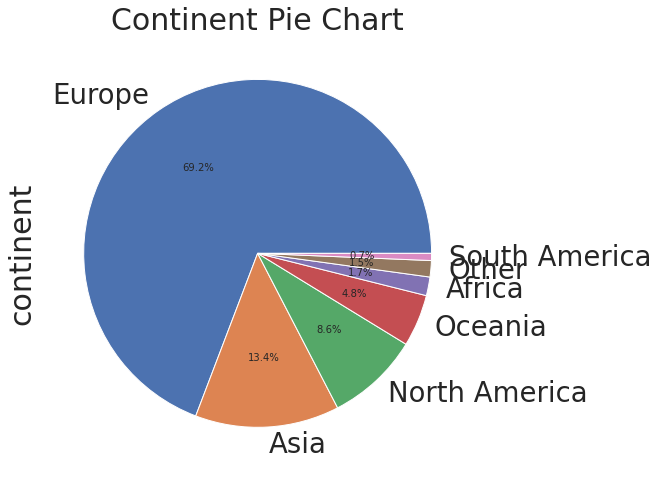

In [134]:
##Reviewer Continent Distribution
plt.figure(figsize=(12,8))
df.continent.value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Continent Pie Chart')
plt.show()

Most of travellers are from Europe. Asia is the Second

In [119]:
#Day_Passed
df['days_since_review'] = df['days_since_review'].map(lambda x: re.findall(r'\d+',x))
df['days_since_review'] = df['days_since_review'].map(lambda x: x[0])
df['days_since_review'] = df['days_since_review'].astype(int)

In [120]:
#Mining some important information from tags
df['Leisure'] = df['Tags'].map(lambda x: 1 if ' Leisure trip ' in x else 0)
df['Business'] = df['Tags'].map(lambda x: 2 if ' Business trip ' in x else 0)
df['Trip_type'] = df['Leisure'] + df['Business']

Approximately , 15000 trips aren't evaluated as leisure or business. Let's assign them numbers with probabilities. I give 80 percent of them as Leisure , 20 percent of them as Business due to previous counts

In [122]:
df['Trip_type'] = df[df['Trip_type'] == 0]['Trip_type'].map(lambda x: 1 if random.random() > 0.2 else 2)
df['Trip_type'] = df['Trip_type'].fillna(0)
df['Trip_type'] = df['Trip_type'] + df['Business'] + df['Leisure']
del df['Leisure'] , df['Business']

In [123]:
df['Trip_type'].value_counts()

1.0    429391
2.0     85821
Name: Trip_type, dtype: int64

Text(0.5, 1.0, 'Trip Type')

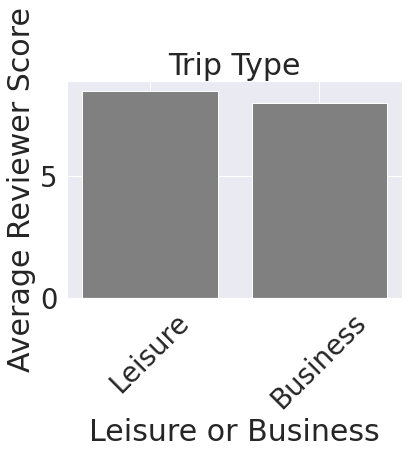

In [148]:
##Trip Type
tt_avg=df.groupby('Trip_type')['Reviewer_Score'].mean()
Index = [1,2]
plt.bar(Index,tt_avg,color='gray')
plt.xticks(Index,['Leisure','Business'],rotation=45)
plt.ylabel('Average Reviewer Score')
plt.xlabel('Leisure or Business')
plt.title('Trip Type')

Business type of trips are rating lower. Trip_type parameter is important

In [124]:
#Couple or Solo or Group or Family_with_older children or Family with younger Children
df['Solo'] = df['Tags'].map(lambda x: 1 if ' Solo traveler ' in x else 0)
df['Couple'] = df['Tags'].map(lambda x: 2 if ' Couple ' in x else 0)
df['Group'] = df['Tags'].map(lambda x: 3 if ' Group ' in x else 0)
df['Family_with_young_children'] = df['Tags'].map(lambda x: 4 if ' Family with young children ' in x else 0)
df['Family_with_older_children'] = df['Tags'].map(lambda x: 5 if ' Family with older children ' in x else 0)
df['whom'] = df['Solo'] + df['Couple'] + df['Group'] + df['Family_with_young_children'] + df['Family_with_older_children']
del df['Solo'], df['Couple'],df['Group'], df['Family_with_young_children'],df['Family_with_older_children']

In [125]:
df.whom.value_counts()

2    252005
1    108431
3     65338
4     60975
5     26320
0      2143
Name: whom, dtype: int64

In [126]:
#I will assign 2 to 0's because it is the most.
df['whom'] = df['whom'].map(lambda x: 2 if x == 0 else x)
df.whom.value_counts()

2    254148
1    108431
3     65338
4     60975
5     26320
Name: whom, dtype: int64

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

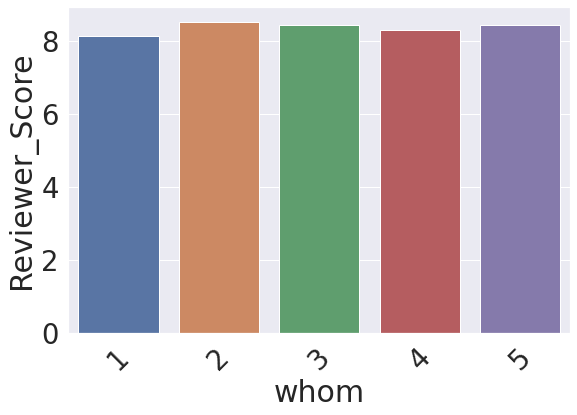

In [146]:
#Whom
whom_hist=df.groupby("whom")['Reviewer_Score'].mean().reset_index().sort_values(by='whom',ascending=False).reset_index(drop=True)
plt.figure(figsize=(9,6))
sns.barplot(x='whom',y='Reviewer_Score', data=whom_hist)
plt.xticks(rotation=45)

This attribute doens't look so important .

In [127]:
#Stayings
df['Stayed_1_days'] = df['Tags'].map(lambda x: 1 if ' Stayed 1 night ' in x else 0)
df['Stayed_2_days'] = df['Tags'].map(lambda x: 2 if ' Stayed 2 nights ' in x else 0)
df['Stayed_3_days'] = df['Tags'].map(lambda x: 3 if ' Stayed 3 nights ' in x else 0)
df['Stayed_4_days'] = df['Tags'].map(lambda x: 4 if ' Stayed 4 nights ' in x else 0)
df['Stayed_5_days'] = df['Tags'].map(lambda x: 5 if ' Stayed 5 nights ' in x else 0)
df['Stayed_6_days'] = df['Tags'].map(lambda x: 6 if ' Stayed 6 nights ' in x else 0)
df['Stayed_7_days'] = df['Tags'].map(lambda x: 7 if ' Stayed 7 nights ' in x else 0)
df['Stayed_8_days'] = df['Tags'].map(lambda x: 8 if ' Stayed 8 nights ' in x else 0)
df['Stayed_9_days'] = df['Tags'].map(lambda x: 9 if ' Stayed 9 nights ' in x else 0)
df['Stayed_10_days'] = df['Tags'].map(lambda x: 10 if ' Stayed 10 nights ' in x else 0)
df['Stayed_11_days'] = df['Tags'].map(lambda x: 11 if ' Stayed 11 nights ' in x else 0)
df['Stayed_12_days'] = df['Tags'].map(lambda x: 12 if ' Stayed 12 nights ' in x else 0)
df['Stayed_13_days'] = df['Tags'].map(lambda x: 13 if ' Stayed 13 nights ' in x else 0)
df['Stayed_14_days'] = df['Tags'].map(lambda x: 14 if ' Stayed 14 nights ' in x else 0)
df['Stayed_15_days'] = df['Tags'].map(lambda x: 15 if ' Stayed 15 nights ' in x else 0)
df['Stayed_16_days'] = df['Tags'].map(lambda x: 16 if ' Stayed 16 nights ' in x else 0)
df['Stayed_17_days'] = df['Tags'].map(lambda x: 17 if ' Stayed 17 nights ' in x else 0)
df['Stayed_18_days'] = df['Tags'].map(lambda x: 18 if ' Stayed 18 nights ' in x else 0)
df['Stayed_19_days'] = df['Tags'].map(lambda x: 19 if ' Stayed 19 nights ' in x else 0)
df['Stayed_20_days'] = df['Tags'].map(lambda x: 20 if ' Stayed 20 nights ' in x else 0)

In [128]:
temp_list = []
for j in range(20,40):
    sum = np.sum(df.iloc[:,j])/(j-19)
    temp_list.append(sum)

In [129]:
staying = np.array(temp_list,dtype=int)
np.sum(staying)

1448806

There are 512470 - 512186 = 284 reviews whose stayings is over 20. I will assign all of them as 21 as conveinence

In [130]:
df['stayed_days'] = df['Stayed_1_days'] + df['Stayed_2_days'] + df['Stayed_3_days'] + df['Stayed_4_days'] + df['Stayed_5_days'] + df['Stayed_6_days'] + df['Stayed_7_days'] + df['Stayed_8_days'] + df['Stayed_9_days'] + df['Stayed_10_days'] + df['Stayed_11_days'] + df['Stayed_12_days'] + df['Stayed_13_days'] + df['Stayed_14_days'] + df['Stayed_15_days'] + df['Stayed_16_days'] + df['Stayed_17_days'] + df['Stayed_18_days'] + df['Stayed_19_days'] + df['Stayed_20_days']
del df['Stayed_1_days'] , df['Stayed_2_days'] , df['Stayed_3_days'] , df['Stayed_4_days'], df['Stayed_5_days'] , df['Stayed_6_days'] , df['Stayed_7_days'] , df['Stayed_8_days'] , df['Stayed_9_days'] , df['Stayed_10_days'] , df['Stayed_11_days'] , df['Stayed_12_days'] , df['Stayed_13_days'] , df['Stayed_14_days'] , df['Stayed_15_days'] , df['Stayed_16_days'] , df['Stayed_17_days'] , df['Stayed_18_days'] , df['Stayed_19_days'] , df['Stayed_20_days']

In [131]:
df.shape

(515212, 23)

In [132]:
df.stayed_days.value_counts()
#Assgining stayings which are over 20 days as 21
df['stayed_days'] = df['stayed_days'].map(lambda x: 21 if x == 0 else x)

In [133]:
#To check
len(df[df['stayed_days'] == 0])

0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text major ticklabel objects>)

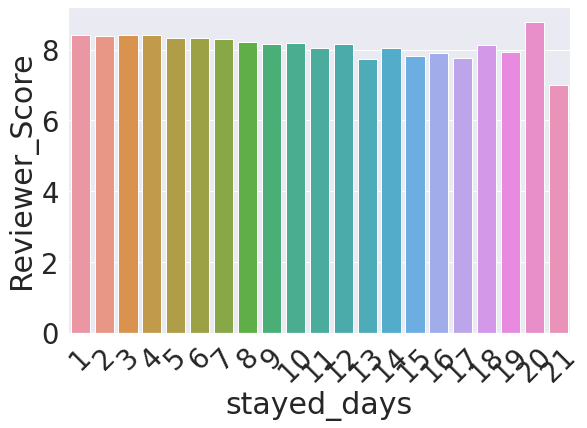

In [143]:
## Stayed_days
stayed_days_hist=df.groupby("stayed_days")['Reviewer_Score'].mean().reset_index().sort_values(by='stayed_days',ascending=False).reset_index(drop=True)
plt.figure(figsize=(9,6))
sns.barplot(x='stayed_days',y='Reviewer_Score', data=stayed_days_hist)
plt.xticks(rotation=45)

According to General trend , the more the staying , the less the reviewer_score .

In [135]:
#Getting year and month infos
year = df['Review_Date'].map(lambda x: x.split('/')[2])
month = df['Review_Date'].map(lambda x: x.split('/')[0])
df['month'] = month
df['year'] = year

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

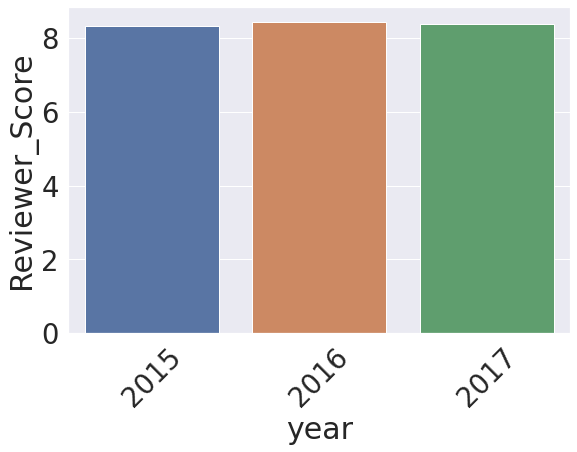

In [145]:
##Year
year_hist=df.groupby("year")['Reviewer_Score'].mean().reset_index().sort_values(by='year',ascending=False).reset_index(drop=True)
plt.figure(figsize=(9,6))
sns.barplot(x='year',y='Reviewer_Score', data=year_hist)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

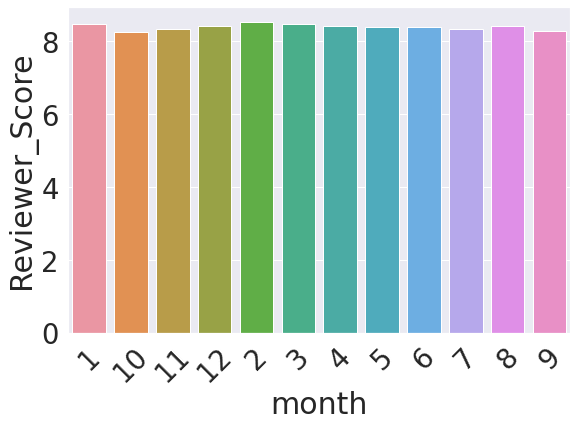

In [144]:
## Month
month_hist=df.groupby("month")['Reviewer_Score'].mean().reset_index().sort_values(by='month',ascending=False).reset_index(drop=True)
plt.figure(figsize=(9,6))
sns.barplot(x='month',y='Reviewer_Score', data=month_hist)
plt.xticks(rotation=45)

Month isn't important.

In [136]:
#Hotel Country
country = df['Hotel_Address'].map(lambda x: x.split()[-1])
country = country.map(lambda x: 'United Kingdom' if x == 'Kingdom' else x)
df['hotel_country'] = country

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

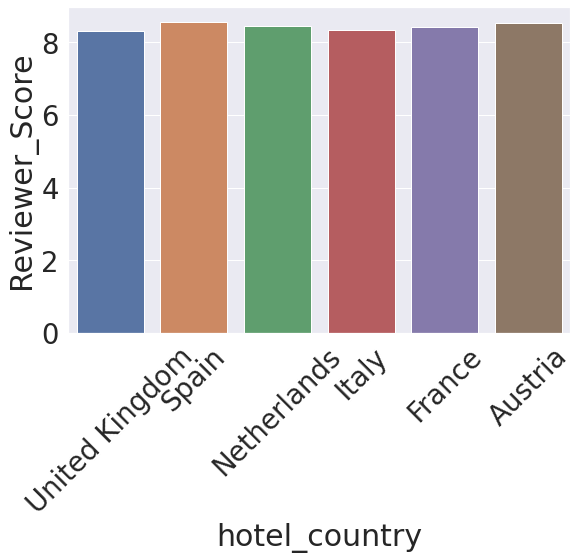

In [149]:
##THE HOTELS OF COUNTRIES
the_hotels_of_countries_hist=df.groupby("hotel_country")['Reviewer_Score'].mean().reset_index().sort_values(by='hotel_country',ascending=False).reset_index(drop=True)
plt.figure(figsize=(9,6))
sns.barplot(x='hotel_country',y='Reviewer_Score', data=the_hotels_of_countries_hist)
plt.xticks(rotation=45)

Hotels in Austria are evaluated with a higher rate than other countries. However, this attribute isn't important

In [140]:
#Mobile device
df['mobile_device'] = df['Tags'].map(lambda x: 1 if ' Submitted from a mobile device ' in x else 0)

Text(0.5, 1.0, 'Mobile Device')

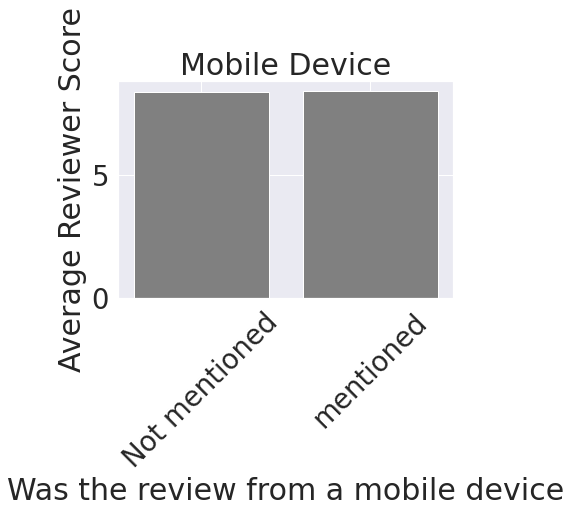

In [147]:
##Mobile Device
md_avg=df.groupby('mobile_device')['Reviewer_Score'].mean()
Index = [0,1]
plt.bar(Index,md_avg,color='gray')
plt.xticks(Index,['Not mentioned','mentioned'],rotation=45)
plt.ylabel('Average Reviewer Score')
plt.xlabel('Was the review from a mobile device')
plt.title('Mobile Device')

Mobile_device parameter isn't  important

In [141]:
##Most satisfied people with respect to continents
df.groupby('continent')['Reviewer_Score'].mean().sort_values(ascending=False).head(7)

continent
North America    8.738323
Oceania          8.600000
South America    8.435853
Europe           8.408091
Africa           8.208048
Other            8.207272
Asia             8.079026
Name: Reviewer_Score, dtype: float64

North Americans are satisfies most, Asians are least .

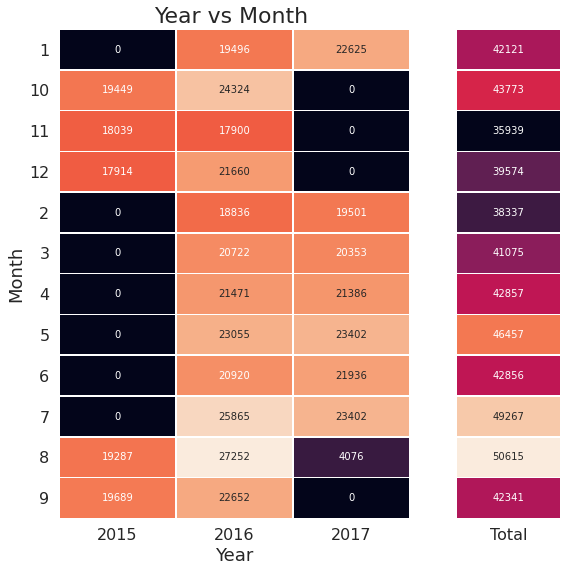

In [142]:
#Year vs Month
##Target_type vs Year
a=df.groupby(['year','month']).size()
a
b=a.unstack(level=0)
e=b.replace(np.nan,0)
e=e.astype(int)

import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(9, 9)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[5, 1.5]) 
ax0 = plt.subplot(gs[0])
sns.heatmap(e,annot=True,fmt='d',linewidths=.5,ax=ax0, cbar=False,annot_kws={"size":10})
ax1 = plt.subplot(gs[1],sharey=ax0)
sns.heatmap(pd.DataFrame(e.sum(axis=1)),annot=True,fmt='d',linewidths=.5,ax=ax1,cbar=False,annot_kws={"size":10})
plt.setp(ax1.get_yticklabels(), visible=False)
plt.setp(ax1.set_ylabel([]),visible=False)
plt.setp(ax0.yaxis.get_majorticklabels(),rotation=0)
ax0.tick_params(axis='y',labelsize=16)
ax0.tick_params(axis='x',labelsize=16)
ax0.set_ylabel("Month",size=18)
ax0.set_xlabel("Year",size=18)
ax1.set_xticklabels(["Total"],size=16)
ax0.set_title("Year vs Month ",size=22,y=1.05,x=0.5)

plt.show()

In [151]:
df.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng', 'review', 'is_bad_review',
       'continent', 'Trip_type', 'whom', 'stayed_days', 'month', 'year',
       'hotel_country', 'mobile_device'],
      dtype='object')

In [153]:
#Correlation Matrix:
corr_df = df[['Average_Score','Additional_Number_of_Scoring','Review_Total_Negative_Word_Counts','Total_Number_of_Reviews','Review_Total_Positive_Word_Counts','Total_Number_of_Reviews_Reviewer_Has_Given','Reviewer_Score','days_since_review','stayed_days','lat','lng']]    
corr_df = corr_df.corr()

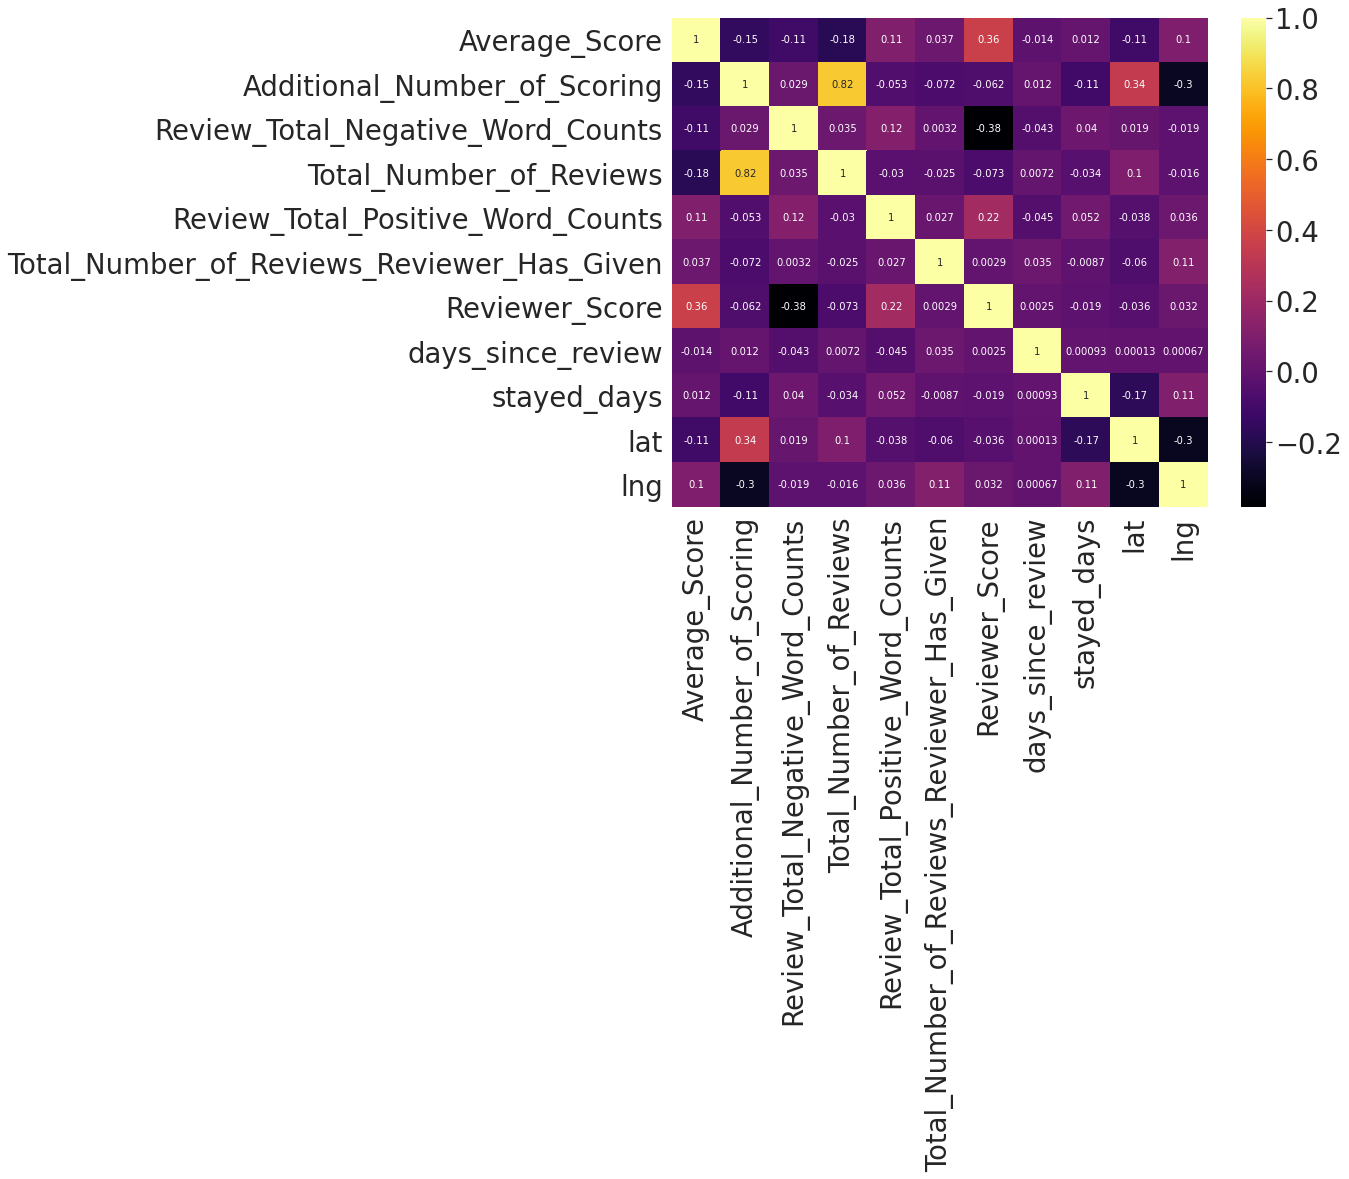

In [154]:
# Set up the matplot figure
f,ax = plt.subplots(figsize=(12,9))

#Draw the heatmap using seaborn
sns.heatmap(corr_df, cmap='inferno', annot=True)

Reviewer_Score may have correlations with Average_Score ,Review_Total_Negative_Word_Counts ,Review_Total_Positive_Word_Counts 

In [169]:
data = df

In [170]:
#Removing unimportant columns
data = data.drop(['Hotel_Address','review','Review_Date','Additional_Number_of_Scoring','Hotel_Name','Reviewer_Nationality','Negative_Review','Total_Number_of_Reviews','Positive_Review','Total_Number_of_Reviews_Reviewer_Has_Given','lat','lng','Tags','days_since_review','whom','month','year','hotel_country','mobile_device'],axis=1)
#Making continent column as numerical via get_dummies
continents = pd.get_dummies(data['continent'])
#In order to get rid of collinearity , removing one column from continents
continents = continents.drop('Other',axis=1)

In [171]:
#For trip_type column , I assigned 0&1 instead of 1&2
data['Trip_type'] = data['Trip_type'].map(lambda x: 0 if x == 2 else x)

In [172]:
data = pd.concat([data,continents],axis = 1)

In [173]:
data = data.rename(columns = {'Trip_type':'Leisure_or_not'})
data = data.drop('continent',axis=1)

In [174]:
y = data['Reviewer_Score'].values
X = data.drop('Reviewer_Score',axis=1).values

In [175]:
#Appliyng XGBoost to our data
from sklearn.model_selection import train_test_split
import xgboost as xgb
X_train ,X_test ,y_train ,y_test = train_test_split(X,y ,test_size=0.2 ,random_state = 20)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
xg_train = xgb.DMatrix(X_train, label=y_train)

In [176]:
xg_test = xgb.DMatrix(X_test, label=y_test)
param = {}
# I used gamma regression 
param['objective'] = 'reg:gamma'
param['eta'] = 0.2
param['max_depth'] = 4
param['silent'] = 1
param['nthread'] = 4
watchlist = [(xg_train, 'train'), (xg_test, 'test')]
num_round = 25

In [177]:
bst = xgb.train(param, xg_train, num_round, watchlist)
pred = bst.predict(xg_test)

[00:12:02] WARNING: ../src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-gamma-nloglik:13.40346	test-gamma-nloglik:13.41817
[1]	train-gamma-nloglik:11.23258	test-gamma-nloglik:11.24459
[2]	train-gamma-nloglik:9.48554	test-gamma-nloglik:9.49578
[3]	train-gamma-nloglik:8.08513	test-gamma-nloglik:8.09347
[4]	train-gamma-nloglik:6.96725	test-gamma-nloglik:6.97403
[5]	train-gamma-nloglik:6.07933	test-gamma-nloglik:6.08484
[6]	train-gamma-nloglik:5.37775	test-gamma-nloglik:5.38252
[7]	train-gamma-nloglik:4.82688	test-gamma-nloglik:4.83129
[8]	train-gamma-nloglik:4.39868	test-gamma-nloglik:4.40194
[9]	train-gamma-nloglik:4.06785	test-gamma-nloglik:4.07046
[10]	train-gamma-nloglik:3.81425	test-gamma-nloglik:3.81699
[11]	train-gamma-nlo

In [178]:
#Calculate Error
error = pred - y_test
error = abs(error)
error_rate = np.mean(error)/np.mean(y_test)
print("error rate = %f " %error_rate )

error rate = 0.129216 


**Feature Engineering**

In [179]:
# add sentiment anaylsis columns

sid = SentimentIntensityAnalyzer()
reviews_df["sentiments"] = reviews_df["review"].apply(lambda x: sid.polarity_scores(x))
reviews_df = pd.concat([reviews_df.drop(['sentiments'], axis=1), reviews_df['sentiments'].apply(pd.Series)], axis=1)

We first start by adding sentiment analysis features because we can guess that customers reviews are highly linked to how they felt about their stay at the hotel. We use Vader, which is a part of the NLTK module designed for sentiment analysis. Vader uses a lexicon of words to find which ones are positives or negatives. It also takes into accout the context of the sentences to determine the sentiment scores. For each text, Vader retuns 4 values:

* a neutrality score
* a positivity score
* a negativity score
* an overall score that summarizes the previous scores

We will integrate those 4 values as features in our dataset.

In [180]:
# add number of characters column
reviews_df["nb_chars"] = reviews_df["review"].apply(lambda x: len(x))

# add number of words column
reviews_df["nb_words"] = reviews_df["review"].apply(lambda x: len(x.split(" ")))

Next, we add some simple metrics for every text:

* number of characters in the text
* number of words in the text

In [181]:
# create doc2vec vector columns
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(reviews_df["review_clean"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vector data
doc2vec_df = reviews_df["review_clean"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
reviews_df = pd.concat([reviews_df, doc2vec_df], axis=1)

The next step consist in extracting vector representations for every review. The module Gensim creates a numerical vector representation of every word in the corpus by using the contexts in which they appear (Word2Vec). This is performed using shallow neural networks. What's interesting is that similar words will have similar representation vectors.

Each text can also be transformed into numerical vectors using the word vectors (Doc2Vec). Same texts will also have similar representations and that is why we can use those vectors as training features.

We first have to train a Doc2Vec model by feeding in our text data. By applying this model on our reviews, we can get those representation vectors.

In [182]:
# add tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(reviews_df["review_clean"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = reviews_df.index
reviews_df = pd.concat([reviews_df, tfidf_df], axis=1)

Finally we add the TF-IDF (Term Frequency - Inverse Document Frequency) values for every word and every document.

But why not simply counting how many times each word appears in every document? The problem with this method is that it doesn't take into account the relative importance of words in the texts. A word that appears in almost every text would not likely bring useful information for analysis. On the contrary, rare words may have a lot more of meanings.

The TF-IDF metric solves this problem:

TF computes the classic number of times the word appears in the text
IDF computes the relative importance of this word which depends on how many texts the word can be found
We add TF-IDF columns for every word that appear in at least 10 different texts to filter some of them and reduce the size of the final output.

In [183]:
reviews_df.head()

,review,is_bad_review,review_clean,neg,neu,pos,compound,nb_chars,nb_words,doc2vec_vector_0,...,word_yoghurt,word_yogurt,word_york,word_young,word_yr,word_yummy,word_zero,word_ziggo,word_zone,word_zoo
499860,small rooms and the beds are freakishly high ...,0,small room bed freakishly high staff nice help...,0.062,0.589,0.349,0.8051,124,24,-0.097308,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
453739,Noise from the corridor Very good localizatio...,0,noise corridor good localization front undergr...,0.000,0.790,0.210,0.4927,84,15,-0.025327,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
484096,Some hot vegetarian food at breakfast would h...,0,hot vegetarian food breakfast would make break...,0.000,0.818,0.182,0.4404,91,15,-0.030415,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
415438,Can t fault anything about this hotel Great l...,0,fault anything hotel great location fantastic ...,0.070,0.679,0.251,0.7845,181,33,-0.090246,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
248620,We were unable to get our taxi to the door of...,1,unable get taxi door hotel saturday october no...,0.118,0.882,0.000,-0.8826,536,100,-0.272792,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [184]:
reviews_df.shape

(51521, 3829)

**EDA for NLP**

In [185]:
# show is_bad_review distribution
reviews_df["is_bad_review"].value_counts(normalize = True)

0    0.956658
1    0.043342
Name: is_bad_review, dtype: float64

Our dataset is highly imbalanced because less than 5% of our reviews are considered as negative ones. This information will be very useful for the modelling part.

Now let's print some wordclouds to have a glimpse at what kind of words apear in our reviews:

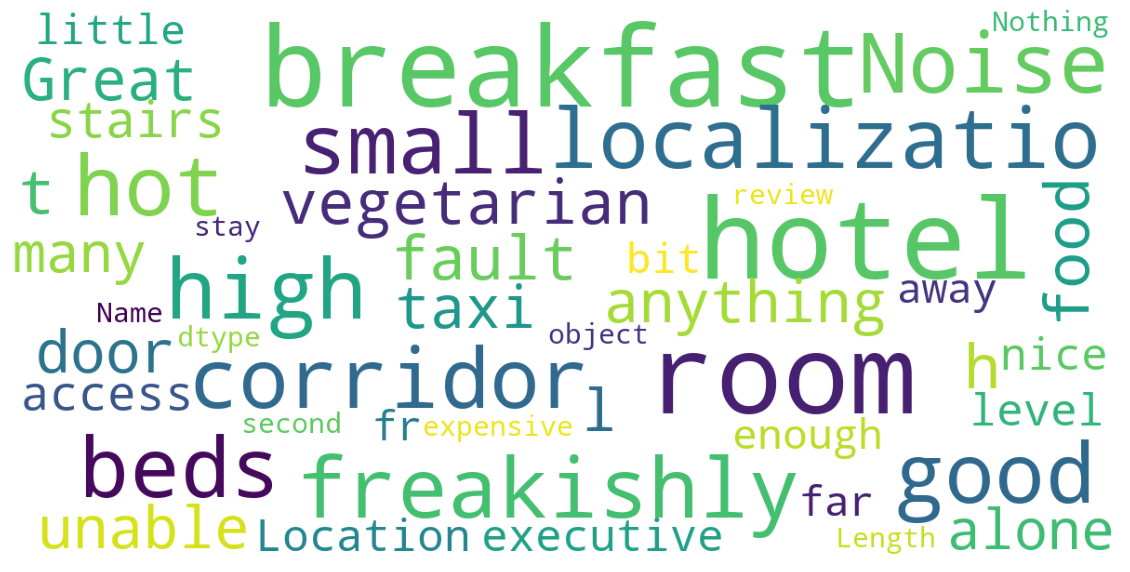

In [186]:
# wordcloud function

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(reviews_df["review"])

Most of the words are indeed related to the hotels: room, staff, breakfast, etc. Some words are more related to the customer experience with the hotel stay: perfect, loved, expensive, dislike, etc.

In [187]:
# highest positive sentiment reviews (with more than 5 words)
reviews_df[reviews_df["nb_words"] >= 5].sort_values("pos", ascending = False)[["review", "pos"]].head(10)

,review,pos
297016,Clean comfortable efficient,1.000
404683,Great clean comfortable Great concierge,0.934
449874,LOVE LOVE and Love,0.934
387389,Great location Safe Comfortable Clean,0.929
484362,Beautiful elegant yet comfortable,0.912
455231,Modern clean beautiful perfect,0.912
271129,Great friendly helpful staff,0.910
216800,Great hotel comfortable clean,0.910
175551,Friendly welcome Comfortable room,0.905
329452,Comfortable clean and friendly,0.902


The most positive reviews indeed correspond to some good feedbacks.

In [188]:
# lowest negative sentiment reviews (with more than 5 words)
reviews_df[reviews_df["nb_words"] >= 5].sort_values("neg", ascending = False)[["review", "neg"]].head(10)

,review,neg
177895,No A C,1.000
276520,Poor service Very poor service arrogant rude ...,0.764
471892,Unfriendly staff Bad breakfast,0.750
451708,nothing excellent friendly staff,0.738
435968,Extremely central No complaints,0.731
381357,none Clean and comfortable,0.713
253907,Noisy rooms poor shower,0.706
309351,Noisy rooms poor breakfast,0.706
216532,nothing all good yes,0.700
242823,Freezing room Broken heating no contact follo...,0.690


Some errors can be found among the most negative reviews: Vader sometimes interpret 'no' or 'nothing' as negative words whereas they are sometimes used to say that there were no problems with the hotel. Fortunately, most of the reviews are indeed bad ones.

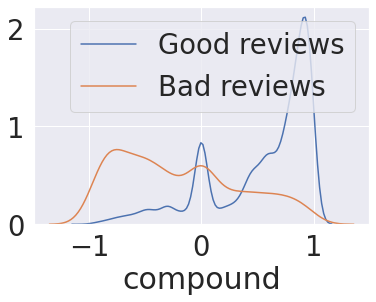

In [189]:
# plot sentiment distribution for positive and negative reviews

import seaborn as sns

for x in [0, 1]:
    subset = reviews_df[reviews_df['is_bad_review'] == x]
    
    # Draw the density plot
    if x == 0:
        label = "Good reviews"
    else:
        label = "Bad reviews"
    sns.distplot(subset['compound'], hist = False, label = label)

The above graph shows the distribution of the reviews sentiments among good reviews and bad ones. We can see that good reviews are for most of them considered as very positive by Vader. On the contrary, bad reviews tend to have lower compound sentiment scores.

This shows us that previously computed sentiment features will be very important in our modelling part.

## **Modelling**

In [190]:
# feature selection
label = "is_bad_review"
ignore_cols = [label, "review", "review_clean"]
features = [c for c in reviews_df.columns if c not in ignore_cols]

# split the data into train and test
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(reviews_df[features], reviews_df[label], test_size = 0.20, random_state = 42)

We first choose which features we want to use to train our model. Then we split our data into two parts:

one to train our model
one to assess its performances
We will next use a Random Forest (RF) classifier for our predictions.

In [191]:
# train a random forest classifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

# show feature importance
feature_importances_df = pd.DataFrame({"feature": features, "importance": rf.feature_importances_}).sort_values("importance", ascending = False)
feature_importances_df.head(20)

,feature,importance
3,compound,0.048894
2,pos,0.024287
0,neg,0.022820
7,doc2vec_vector_1,0.019576
10,doc2vec_vector_4,0.017497
9,doc2vec_vector_3,0.016934
1,neu,0.016254
8,doc2vec_vector_2,0.015925
6,doc2vec_vector_0,0.015652
4,nb_chars,0.015649


The most important features are indeed the ones that come from the previous sentiment analysis. The vector representations of the texts also have a lot of importance in our training. Some words appear to have a fairly good importance as well.

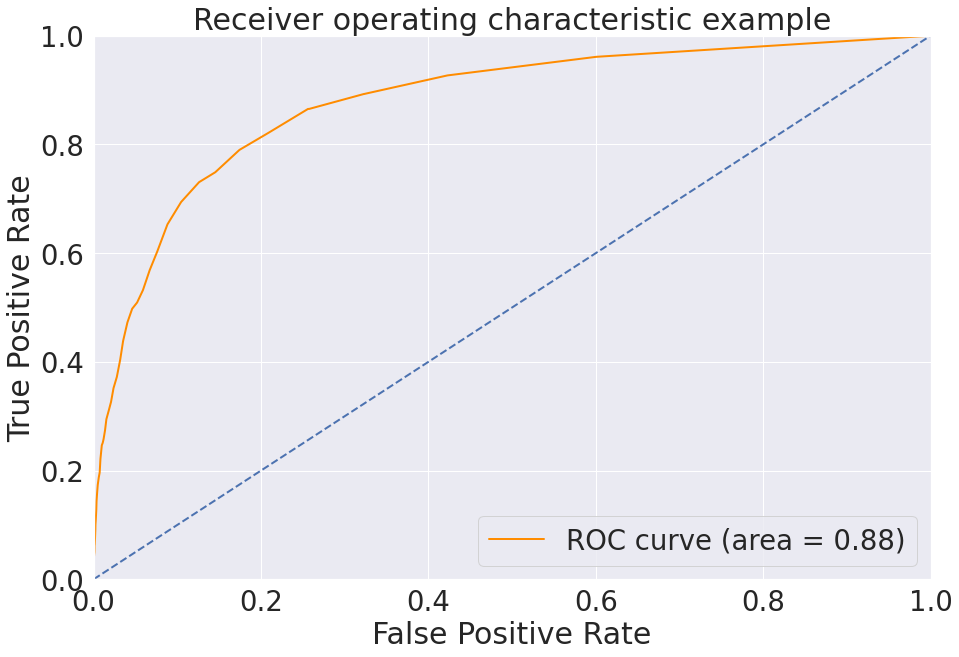

In [192]:
# ROC curve

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

y_pred = [x[1] for x in rf.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

The ROC (Receiver Operating Characteristic) curve is usually a good graph to summarize the quality of our classifier. The higher the curve is above the diagonal baseline, the better the predictions. Although the AUC ROC (Area Under the Curve ROC) is very good, we should not use here the ROC curve to assess the quality of our model.

Why? First let us remind the False Positive Rate formula, which corresponds to the x axis of the ROC curve: FPR (False Positive Rate) = # False Positives / # Negatives.

Here the # Negatives corresponds to our number of good reviews which is very high because our dataset is imbalanced. This means that even with some False Positives, our FPR will tend to stay very low. Our model will be able to make a lot of false positives predictions and still have a low false positive rate, while increasing the true positive rate and therefore artificially increasing the AUC ROC metric.

In [194]:
pip install funcsigs

Note: you may need to restart the kernel to use updated packages.


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.35')

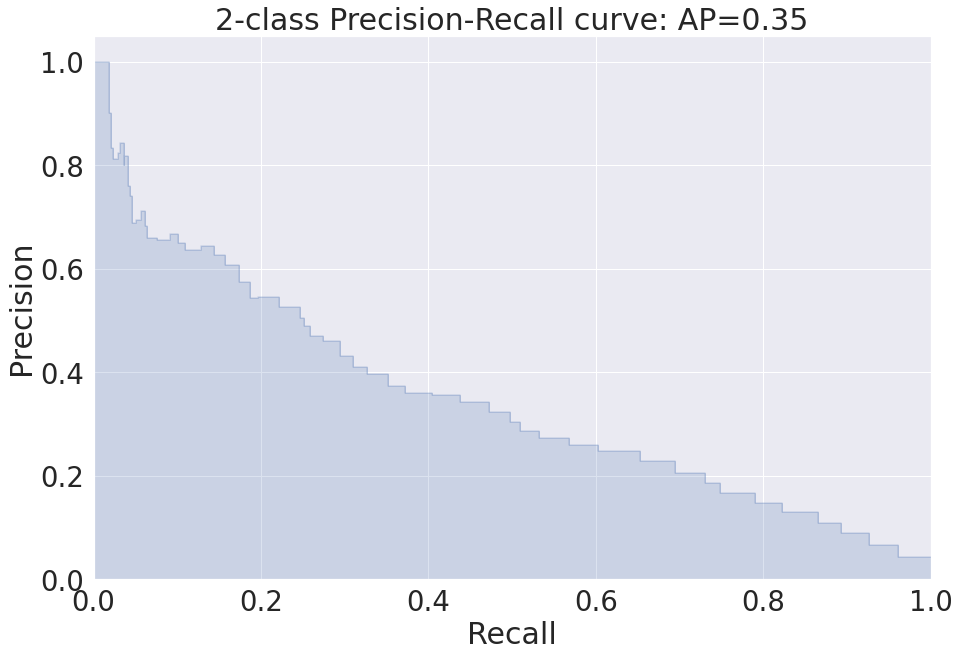

In [195]:
# PR curve

from sklearn.metrics import average_precision_score, precision_recall_curve
from funcsigs import signature

average_precision = average_precision_score(y_test, y_pred)

precision, recall, _ = precision_recall_curve(y_test, y_pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})

plt.figure(1, figsize = (15, 10))
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

A better metric in this imbalanced situation is the AUC PR (Area Under the Curve Precision Recall), or also called AP (Average Precision).

We can see that the precision decreases when we increase the recall. This shows us that we have to choose a prediction thresold adapted to our needs. If our goal is to have a high recall, we should set a low prediction thresold that will allow us to detect most of the observations of the positive class, but with a low precision. On the contrary, if we want to be really confident about our predictions but don't mind about not finding all the positive observations, we should set a high thresold that will get us a high precision and a low recall.

In order to know if our model performs better than another classifier, we can simply use the AP metric. To assess the quality of our model, we can compare it to a simple decision baseline. Let's take a random classifier as a baseline here that would predict half of the time 1 and half of the time 0 for the label.

Such a classifier would have a precision of 4.3%, which corresponds to the proportion of positive observations. For every recall value the precision would stay the same, and this would lead us to an AP of 0.043. The AP of our model is approximately 0.35, which is more than 8 times higher than the AP of the random method. This means that our model has a good predictive power.

# **Conclusion**

It is completely possible to use only raw text as input for making predictions. The most important thing is to be able to extract the relevant features from this raw source of data. This kind of data can often come as a good complementary source in data science projects in order to extract more learning features and increase the predictive power of the models.